In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

# Se hace arreglo con datos experimentales de Absorbancia $A$ Vs longitud de onda $\lambda$ y de ajustan valores para todos los calculos y nombres de archivos

#### ESTE CODIGO ESTA HECHO PARA QUE LA PERSONA FIJE MIRANDO LAS GRAFICAS LOS VALORES QUE DEJA Y DESPRECIA DE LOS DATOS DE
#### ABSORVANCIA Vs LONG. DE ONDA CON las variables numEleEmp y numEleTer
#### Y TAMBIEN PENSANDO QUE MIRADO LAS GRAFICAS LA PERSONA ESCOGE ENTRE QUE PUNTOS EN LA GRAFICA DE
#### RELACI0N DE TAUC Vs ENERGIA DE LA LUZ INCIDENTE SE ESCOGE LA ZONA ADECUADA MEDIANTE LAS VARIABLES 

#### Poner archivo de datos experiemtnales Absorbancai Vs Long onda correcto

#-------

Entre estos simbolos estan las variables que por favor uno escoge a mano

#-------

In [2]:
#----------------------------------
#variables
Tcal="400°C" #por favor mantener ###°C
#numEleEmp=138 #el numero de elementos desde el que se usan datos abosorbancia Vs long de onda o Relación Tauc Vs Energia luz laser
#numEleTer=200 #el numero de elementos hasta donde se usan datos abosorbancia Vs long de onda o Relación Tauc Vs Energia luz laser
#PARA LA RELACION DE TAUC VS ENERGÍA DE LA LUZ LASER INCIDENTE A LA MUESTRA
#indTaucIni sin saltos no deseados: 400°C:120 425°C:120 438°C:115 450°C:105 475°C:120 500°C:85
indTaucIni=120 #indTaucIni=137 #podria ser =numEleEmp
indTaucFin=200 #tal vez no se usa
expRelTauc=2 # 2 (int) o 1/2 por favor exponenete de relación de Tauc para Tauc Plot que depende del material y como la transicion
groRelTauc=1.0 #el grosor en cm del recipiente que atraviesa el haz laser en la muestra al medir la absorbancia Vs Long. ond
Fecha="2021_M2_18_" #"2021_M2_18_"
expStr=str(expRelTauc)
ZonEneStr="BajEnergias" #"BajEnergias" o "AltEnergias"
#-------------------------------------------
#OJO: Cambiar marErr=0.01 segun "BajEnergias" o "AltEnergias" abajo
#marErr=0.01 #Margen de error para escoger puntos para graf. 3D y desvi. estandar BajEnergias:0.01 Altenergias:18.0;50.0
#-------------------------------------------
Formato=".pdf" #"png" o "pdf"
#exponente en string para nombre de archivos, transiciones Tauc Plot en https://pubs.acs.org/doi/pdf/10.1021/acscombsci.6b00053
expNom=""
if expRelTauc==2:
    expNom="exp2_0"
    print("Indirect allowed transition")
elif expRelTauc==0.5:
    expNom="exp0_5"
    print("Direct allowed transition")
elif expRelTauc==3/2:
    expNom="exp1_5"
    print("Direct forbidden transition")
elif expRelTauc==3:
    expNom="exp3_0"
    print("Indirect forbidden transition")
else:
    print("Exponente no concuerda con alguna transicion")
#------------------------------------------

#Se hace arreglo con datos experimentales de Absorbancia A Vs longitu de onda lambda
absVsLonOnda=np.loadtxt("2019_Mes9_6_V2O5_"+Tcal[:3]+"C_No_acuosa_Abs.csv", skiprows=2, delimiter=";")#absVsLonOnda=np.loadtxt("2019_Mes9_6_V2O5_425C_No_acuosa_Abs.csv", skiprows=2, delimiter=";")
Energia=1240.0/absVsLonOnda[:, 0] #Energia=1240.0/absVsLonOnda[numEleEmp:, 0]
relTauc=( ( (2.303/groRelTauc)*absVsLonOnda[:, 1])*Energia  )**expRelTauc #relTauc=( ( 2.303*absVsLonOnda[numEleEmp:, 1])*Energia  )


print("Energia es", Energia, "con np.shape de", np.shape(Energia), "y elemento donde se empieza de este arreglo de energía es", indTaucIni, "con valor de energia de", Energia[indTaucIni])
print("relTauc es", relTauc, "con np.shape de", np.shape(relTauc), "y elemento donde se empieza de este arreglo de realcion de Tauc es", indTaucIni, "con valor de realcion de tauc de", relTauc[indTaucIni])
print("Energia[indTaucIni:] usado tiene np.shape de", np.shape(Energia[indTaucIni:]))
print("relTauc[indTaucIni:] usado tiene np.shape de", np.shape(relTauc[indTaucIni:]))
#print("derRelTaucY con np.shape de", np.shape(derRelTaucY),"es", derAbsY)
print("Energia[indTaucIni:]=", Energia[indTaucIni:], "con np.shape", np.shape(Energia[indTaucIni:]))
print("relTauc[indTaucIni:]=", relTauc[indTaucIni:])
#print("derRelTaucY[indTaucIni:] es", derRelTaucY[indTaucIni:], "np.shape", np.shape(derRelTaucY[indTaucIni:]))
#print("Energia", "debe dar primero", 1240.0/absVsLonOnda[numEleEmp, 0], "verifica aqui", Energia)
#print("RelTauc debe dar primero", ( (2.303*absVsLonOnda[numEleEmp, 1])*Energia[0]  ), "y da", relTauc)


Indirect allowed transition
Energia es [6.52631579 6.4921466  6.45833333 6.42487047 6.39175258 6.35897436
 6.32653061 6.29441624 6.26262626 6.23115578 6.2        6.16915423
 6.13861386 6.10837438 6.07843137 6.04878049 6.01941748 5.99033816
 5.96153846 5.93301435 5.9047619  5.87677725 5.8490566  5.82159624
 5.79439252 5.76744186 5.74074074 5.71428571 5.68807339 5.66210046
 5.63636364 5.61085973 5.58558559 5.56053812 5.53571429 5.51111111
 5.48672566 5.46255507 5.43859649 5.41484716 5.39130435 5.36796537
 5.34482759 5.32188841 5.2991453  5.27659574 5.25423729 5.23206751
 5.21008403 5.18828452 5.16666667 5.14522822 5.12396694 5.10288066
 5.08196721 5.06122449 5.04065041 5.02024291 5.         4.97991968
 4.96       4.94023904 4.92063492 4.90118577 4.88188976 4.8627451
 4.84375    4.82490272 4.80620155 4.78764479 4.76923077 4.75095785
 4.73282443 4.7148289  4.6969697  4.67924528 4.66165414 4.64419476
 4.62686567 4.60966543 4.59259259 4.57564576 4.55882353 4.54212454
 4.52554745 4.50909091 4

 5.34601395e-02 5.31230622e-02 5.27876608e-02] con np.shape de (911,) y elemento donde se empieza de este arreglo de realcion de Tauc es 120 con valor de realcion de tauc de 434.58723572353597
Energia[indTaucIni:] usado tiene np.shape de (791,)
relTauc[indTaucIni:] usado tiene np.shape de (791,)
Energia[indTaucIni:]= [4.         3.98713826 3.97435897 3.96166134 3.94904459 3.93650794
 3.92405063 3.91167192 3.89937107 3.88714734 3.875      3.86292835
 3.85093168 3.83900929 3.82716049 3.81538462 3.80368098 3.79204893
 3.7804878  3.76899696 3.75757576 3.74622356 3.73493976 3.72372372
 3.71257485 3.70149254 3.69047619 3.67952522 3.66863905 3.65781711
 3.64705882 3.63636364 3.62573099 3.61516035 3.60465116 3.5942029
 3.58381503 3.57348703 3.56321839 3.5530086  3.54285714 3.53276353
 3.52272727 3.51274788 3.50282486 3.49295775 3.48314607 3.47338936
 3.46368715 3.454039   3.44444444 3.43490305 3.42541436 3.41597796
 3.40659341 3.39726027 3.38797814 3.37874659 3.36956522 3.3604336
 3.35135135 3

# Grafica de absrobancias Vs Longitud de onda

<IPython.core.display.Javascript object>


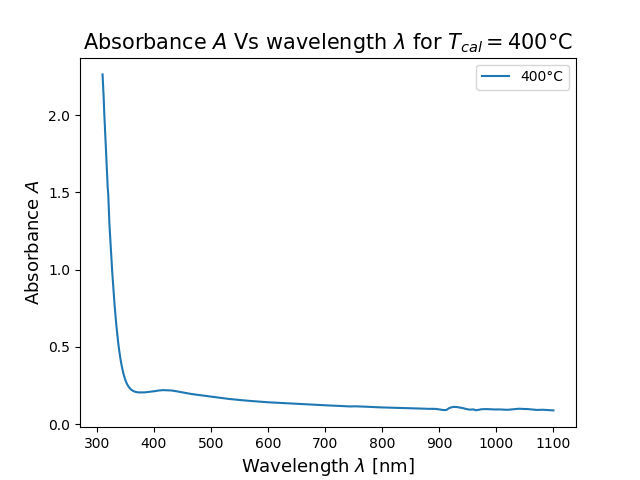

In [3]:
plt.figure()
plt.plot(absVsLonOnda[indTaucIni:, 0], absVsLonOnda[indTaucIni:, 1], label=Tcal)
plt.title("Absorbance "+r"$A$"+" Vs wavelength "+r"$\lambda$"+" for "+r"$T_{cal}=$"+Tcal, size=15)
plt.xlabel(r"Wavelength $\lambda$ [nm]", size=13)
plt.ylabel(r"Absorbance $A$", size=13)
plt.legend(loc=0)
plt.savefig(Fecha+"V2O5NoAcu_AbsorbanciaVsLongOnda_"+Tcal+expNom+ZonEneStr+Formato)

# Grafica de relacion de Tauc Vs energia y de su primera derivada respecto a (hf)

<IPython.core.display.Javascript object>


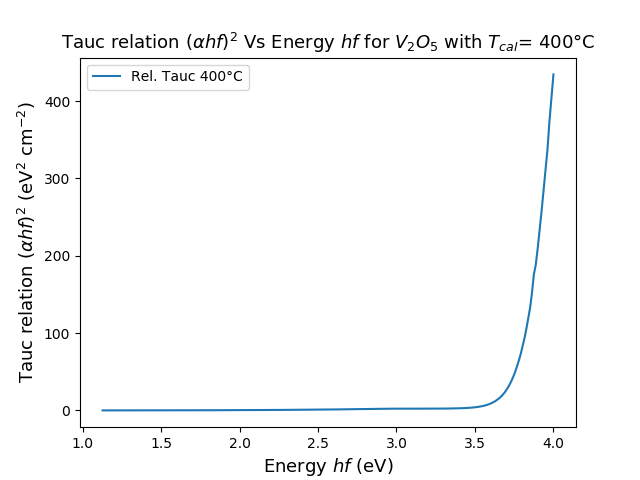

<IPython.core.display.Javascript object>


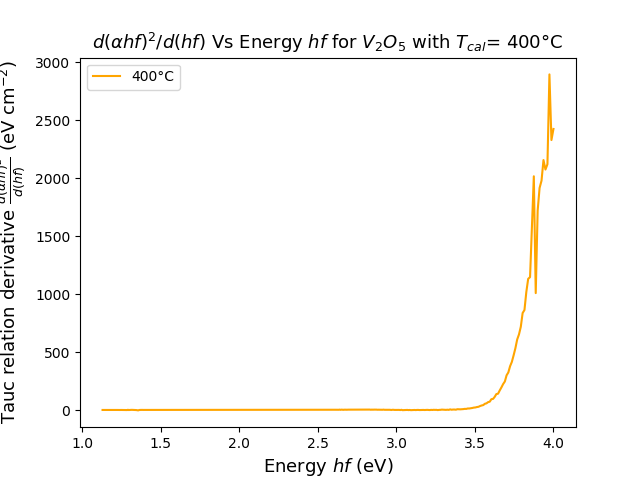

In [4]:
plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Rel. Tauc "+Tcal)
#BORRADOR PARA VER DERIVADA DE REL TAUC VS ENERGIA
#plt.scatter(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label="$derTauc$", color="orange")#Energia[indTaucIni:-1] va hasta -1 porque derRelTaucY[indTaucIni:] para tener el mismo NO de elementos que la derivada 
plt.title("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs Energy $hf$ for $V_{2}O_{5}$ with $T_{cal}$= "+Tcal, size=13)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0)
#plt.xlim(0.0, 4.0)
#plt.ylim(0.0, 3.0)
plt.savefig(Fecha+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+Tcal+expNom+ZonEneStr+Formato)
#plt.show()

#Grafica de derivada 1 de la rel. Tauc resp. (hf)
derRelTaucY=np.diff(relTauc)/np.diff(Energia)
plt.figure()
plt.plot(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label=Tcal, color="orange")
plt.title(r"$d(\alpha hf)^{"+expStr+r"}/d(hf)$"+" Vs Energy $hf$ for $V_{2}O_{5}$ with $T_{cal}$= "+Tcal, size=13)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation derivative "+r"$\frac{d(\alpha hf)^{"+expStr+r"}}{d(hf)}$"+" (eV cm$^{-2}$)", size=13)
plt.legend(loc=0)
plt.show()

# Ajuste lineal a relación de Tauc Vs energía
### Por favor colocar indices [ indLinIni, indLinFin ] entre 0 y indTaucIni con:

In [5]:
print("indTaucIni=", indTaucIni, "y maximo poner", np.shape(Energia))

indTaucIni= 120 y maximo poner (911,)


In [6]:
#-----------------------------------------------
#Las siguientes dos constates con indices deben encerrar la zona de  interes para el ajuste lineal por Tauc Plot
indLinIni=indTaucIni #250 #230 #indice para hacer el ajuste lineal por Tauc Plot INICIAL
indLinFin=indTaucIni+45 #500 #275  #indice para hacer el ajuste lineal por Tauc Plot FINAL
marco=1.3 #distancia de borde alrededor regre. lin.
completo=True #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
limVerdes=True #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
numPunAjuLinTauc=10 #numero puntos ajuste lineal para tuac plot
#-----------------------------------------------


#PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER EAJUDTE LINEAL TAUC PLOT
indLinIniMej=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
linTaucXMej=[]
linTaucYMej=[]
#variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
slopeTaucMej=0.0
interceptTaucMej=0.0
r_valueTaucMej=0.0 # valor de r para ajuste lienal de relacion de Tauc optimizado el del mejor resultado
p_valueTaucMej=0.0

std_errTaucMej=0.0
"""
staErrSlopeTaucMej=0.0
staErrIntTaucMej=0.0
"""

for i in range( indLinIni, indLinFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
    linTaucXPos=Energia[i:(i+numPunAjuLinTauc)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
    linTaucYPos=relTauc[i:(i+numPunAjuLinTauc)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
    
    slopeTaucPos, interceptTaucPos, r_valueTaucPos, p_valueTaucPos, std_errTaucPos = stats.linregress(linTaucXPos, linTaucYPos)
    """
    #Regresion lineal ideal posiblemente
    regLinPos=stats.linregress(linTaucXPos, linTaucYPos)
    #Variables de la regresion lineal ideal posible
    slopeTaucPos=regLinPos.slope
    interceptTaucPos=regLinPos.intercept
    r_valueTaucPos=regLinPos.rvalue
    p_valueTaucPos=regLinPos.pvalue
    staErrSlopeTaucPos=regLinPos.stderr
    staErrIntTaucPos=regLinPos.intercept_stderr
    """
    
    if i == indLinIni:
        indLinIniMej=i 
        linTaucXMej=linTaucXPos
        linTaucYMej=linTaucYPos
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMej=slopeTaucPos
        interceptTaucMej=interceptTaucPos
        r_valueTaucMej=r_valueTaucPos
        p_valueTaucMej=p_valueTaucPos
        
        std_errTaucMej=std_errTaucPos
        """
        staErrSlopeTaucMej=staErrSlopeTaucPos
        staErrIntTaucMej=staErrIntTaucPos
        """
    
    elif r_valueTaucPos >= r_valueTaucMej:
        indLinIniMej=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
        linTaucXMej=linTaucXPos
        linTaucYMej=linTaucYPos
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMej=slopeTaucPos
        interceptTaucMej=interceptTaucPos
        r_valueTaucMej=r_valueTaucPos
        p_valueTaucMej=p_valueTaucPos
       
        std_errTaucMej=std_errTaucPos
        """
        staErrSlopeTaucMej=staErrSlopeTaucPos
        staErrIntTaucMej=staErrIntTaucPos
        """
        
#Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
# estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
ajuTaucXMej=np.linspace(-interceptTaucMej/slopeTaucMej, Energia[indLinIniMej], 1000) #Diosito por mediante mejoralos Danito bello!!!
ajuTaucYMej=( slopeTaucMej*ajuTaucXMej )+interceptTaucMej
gapOptLin=-interceptTaucMej/slopeTaucMej
gapOptLinStr=str(gapOptLin)[:4]+"eV"

## Ahora gráfica Rel Tauc Vs energía con ajuste lineal

Empieza en indLinIniMej= 120 y termina en 129 tomando 10 puntos.
Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado= 3.8053439175004122 +- error standar de la pendiente de 49.112224652687466


<IPython.core.display.Javascript object>


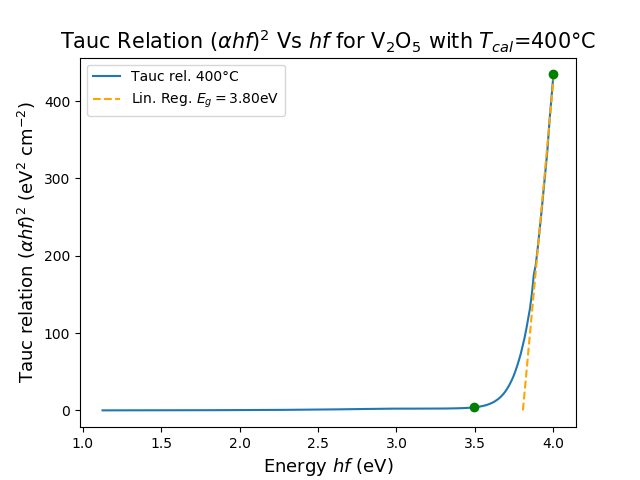

In [7]:
print("Empieza en indLinIniMej=", indLinIniMej, "y termina en", indLinIniMej+numPunAjuLinTauc-1, "tomando", numPunAjuLinTauc, "puntos.")
print("Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado=", -interceptTaucMej/slopeTaucMej, "+- error standar de la pendiente de", std_errTaucMej)

plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Tauc rel. "+Tcal)
plt.plot(ajuTaucXMej, ajuTaucYMej, "--", color="orange", label="Lin. Reg. "+r"$E_{g}=$"+gapOptLinStr)
if limVerdes==True:
    plt.plot( [Energia[indLinIni], Energia[indLinFin]], [relTauc[indLinIni], relTauc[indLinFin]], 'o', color='green' )
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs $hf$ for V$_{2}$O$_{5}$ with $T_{cal}$="+Tcal, size=15)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0)
if completo==False:
    plt.xlim(ajuTaucXMej[0]-marco, ajuTaucXMej[-1]+marco)
    plt.ylim(ajuTaucYMej[0], ajuTaucYMej[-1]+marco)    
plt.savefig(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+Tcal+expNom+ZonEneStr+Formato)

# Regresión lineal alrededor de punto donde es máxima la derivada 1 filtrada con Savitzky Golay

<IPython.core.display.Javascript object>


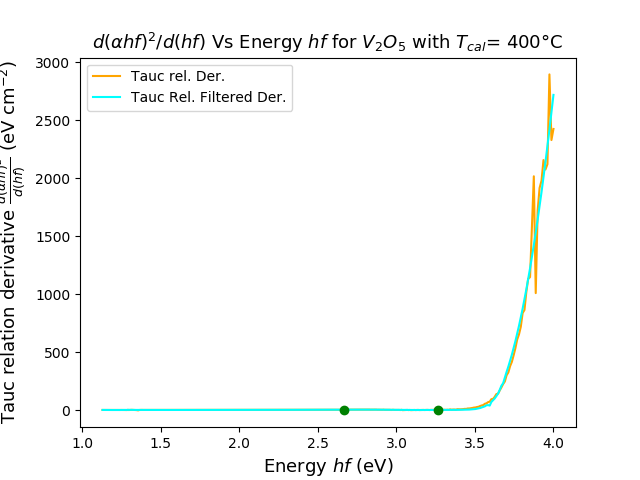

In [8]:
from scipy.signal import savgol_filter

#----------------
numPunAjuLinTaucFil=5 #numero puntos ajuste lineal para tuac plot BajEnergias:10 AltEnergias:
indTaucFilIni=indTaucIni+numPunAjuLinTaucFil+65 #210:BajEnergias
indTaucFilFin=indTaucIni+numPunAjuLinTaucFil+150 #500:BajEnergias
limVerdesFil=True
completoFil=False
punExtAjuTauc=5 #30
#----------------

#Derivada 1 de la rel. de Tauc en [indTaucIni:] para evitar nans y errores con filtro SG
derRelTaucY=np.diff(relTauc[indTaucIni:])/np.diff(Energia[indTaucIni:]) #derRelTaucY=np.diff(relTauc)/np.diff(Energia)
#Verificar que derRelTaucY no tenga nans que arrojen error LinAlgError: SVD did not converge in Linear Least Squares
#print("derRelTaucY=", derRelTaucY)
#Derivada 1 de rel. de Tauc filtrada/suavizada 
derRelTaucY_filSG=savgol_filter(derRelTaucY, 51, 3)

#Grafica de derivada 1 de la rel. Tauc resp. (hf)
#{np.shape(derRelTaucY)=np.shape(Energia[indTaucIni:-1])=np.shape(derRelTaucY_filSG)}
plt.figure()
plt.plot(Energia[indTaucIni:-1], derRelTaucY, label="Tauc rel. Der.", color="orange") #plt.plot(Energia[indTaucIni:-1], derRelTaucY[indTaucIni:], label="Tauc rel. Der.", color="orange")
plt.plot(Energia[indTaucIni:-1], derRelTaucY_filSG, label="Tauc Rel. Filtered Der.", color="cyan") #plt.plot(Energia[indTaucIni:-1], derRelTaucY_filSG[indTaucIni:], label="Tauc Rel. Filtered Der.", color="cyan")
if limVerdesFil==True:
    plt.plot( [Energia[indTaucFilIni], Energia[indTaucFilFin]], [relTauc[indTaucFilIni], relTauc[indTaucFilFin]], 'o', color='green' )
plt.title(r"$d(\alpha hf)^{"+expStr+r"}/d(hf)$"+" Vs Energy $hf$ for $V_{2}O_{5}$ with $T_{cal}$= "+Tcal, size=13)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation derivative "+r"$\frac{d(\alpha hf)^{"+expStr+r"}}{d(hf)}$"+" (eV cm$^{-2}$)", size=13)
plt.legend(loc=0)
plt.show()

Empieza en indLinIniMejFil= 253 y termina en 257 tomando 5 puntos.
Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado= 2.23554825017588
El indice donde la derivada de la rel. de Tauc es maxima y su correspondeinte valor de enrgia son resp. 253 2.799097065462754


<IPython.core.display.Javascript object>


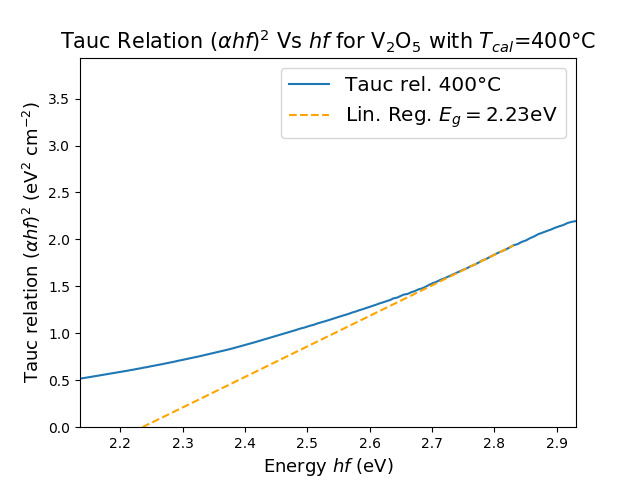

In [9]:
#Se calcula el maximo de la derivada de la rel. de Tauc filtrada entre [indTaucFilIni,indTaucFilFin]
#derTaucY_fil_indMax=np.argmax( derRelTaucY_filSG[indTaucFilIni,indTaucFilFin+1] )

marcoYFil=2.0 #BajEnergias:0.7 #distancia de borde alrededor regre. lin.
marcoXFil=0.1 #Para marco horizontal diferente al vertical  (0.0 normalmente)
completoFil=False #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
limVerdesFil=False #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
PunRojReg=False #True: se muestran los puntos optimizados con for para reg. lineal, False: no se muestran
#-----------------------------------------------


#PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER EAJUDTE LINEAL TAUC PLOT
indLinIniMejFil=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
linTaucXMejFil=[]
linTaucYMejFil=[]
#variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
slopeTaucMejFil=0.0
interceptTaucMejFil=0.0
r_valueTaucMejFil=0.0 # valor de r para ajuste lienal de relacion de Tauc optimizado el del mejor resultado
p_valueTaucMejFil=0.0
std_errTaucMejFil=0.0
#Derivada maxima o mejorada que se verifica en for
derRelTaucY_filSGMej=0.0

for i in range( indTaucFilIni, indTaucFilFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
    linTaucXPosFil=Energia[(i-numPunAjuLinTaucFil):(i+numPunAjuLinTaucFil+1)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
    linTaucYPosFil=relTauc[(i-numPunAjuLinTaucFil):(i+numPunAjuLinTaucFil+1)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
    
    slopeTaucPosFil, interceptTaucPosFil, r_valueTaucPosFil, p_valueTaucPosFil, std_errTaucPosFil = stats.linregress(linTaucXPosFil, linTaucYPosFil)
    
    if i == indTaucFilIni:
        indLinIniMejFil=i 
        linTaucXMejFil=linTaucXPosFil
        linTaucYMejFil=linTaucYPosFil
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMejFil=slopeTaucPosFil
        interceptTaucMejFil=interceptTaucPosFil
        r_valueTaucMejFil=r_valueTaucPosFil
        p_valueTaucMejFil=p_valueTaucPosFil
        std_errTaucMejFil=std_errTaucPosFil
        #Derivaada maxima se define por el momento al menos
        derRelTaucY_filSGMej=derRelTaucY_filSG[i-indTaucIni]
    
    elif derRelTaucY_filSG[i-indTaucIni] >= derRelTaucY_filSGMej:
        indLinIniMejFil=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
        linTaucXMejFil=linTaucXPosFil
        linTaucYMejFil=linTaucYPosFil
        #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
        slopeTaucMejFil=slopeTaucPosFil
        interceptTaucMejFil=interceptTaucPosFil
        r_valueTaucMejFil=r_valueTaucPosFil
        p_valueTaucMejFil=p_valueTaucPosFil
        std_errTaucMejFil=std_errTaucPosFil
        #Derivaada maxima se define por el momento al menos
        derRelTaucY_filSGMej=derRelTaucY_filSG[i-indTaucIni]
     
    #Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
# estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
ajuTaucXMejFil=np.linspace(-interceptTaucMejFil/slopeTaucMejFil, Energia[indLinIniMejFil-punExtAjuTauc], 1000) #Diosito por mediante mejoralos Danito bello!!!
ajuTaucYMejFil=( slopeTaucMejFil*ajuTaucXMejFil )+interceptTaucMejFil
gapOptLinFil=-interceptTaucMejFil/slopeTaucMejFil
gapOptLinFilStr=str(gapOptLinFil)[:4]+"eV"

#Se grafica la rel. de Tauc con este ajuste lineal
print("Empieza en indLinIniMejFil=", indLinIniMejFil, "y termina en", indLinIniMejFil+numPunAjuLinTaucFil-1, "tomando", numPunAjuLinTaucFil, "puntos.")
print("Con este intervalos optimizado para ser el mas lineal se tiene un Gap Eg optimizado=", gapOptLinFil)
print("El indice donde la derivada de la rel. de Tauc es maxima y su correspondeinte valor de enrgia son resp.", indLinIniMejFil, Energia[indLinIniMejFil])

plt.figure()
plt.plot(Energia[indTaucIni:], relTauc[indTaucIni:], label="Tauc rel. "+Tcal)
plt.plot(ajuTaucXMejFil, ajuTaucYMejFil, "--", color="orange", label="Lin. Reg. "+r"$E_{g}=$"+gapOptLinFilStr)
if limVerdesFil==True:
    plt.plot( [Energia[indTaucFilIni], Energia[indTaucFilFin]], [relTauc[indTaucFilIni], relTauc[indTaucFilFin]], 'o', color='green', markersize=7 )
if PunRojReg==True:
    plt.scatter( linTaucXMejFil, linTaucYMejFil, color="red" )
plt.title("Tauc Relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" Vs $hf$ for V$_{2}$O$_{5}$ with $T_{cal}$="+Tcal, size=15)
plt.xlabel("Energy $hf$ (eV)", size=13)
plt.ylabel("Tauc relation "+r"$(\alpha hf)^{"+expStr+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=13)
plt.legend(loc=0, fontsize="x-large")
if completoFil==False:
    plt.xlim(ajuTaucXMejFil[0]-marcoXFil, ajuTaucXMejFil[-1]+marcoXFil) #plt.xlim(ajuTaucXMejFil[0]-marcoFil-marcoXFil, ajuTaucXMejFil[-1]+marcoFil+marcoXFil)
    plt.ylim(ajuTaucYMejFil[0], ajuTaucYMejFil[-1]+marcoYFil) #plt.ylim(ajuTaucYMejFil[0], ajuTaucYMejFil[-1]+marcoFil)    
plt.savefig(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLinFiltraStravitzkyGolay_"+Tcal+expNom+ZonEneStr+Formato)

# Variación de gap de energía Eg con número de puntos de la regresión lineal

#2020_M5_4: 

#Escogemos puntos inicial y final para entre ellos seleccionando ciertos puntos ir calculando el 
#gap de energia optico, son enteros int porque son indices 
numPun=40 #10
indPunIni=280#257-30 #257
indPunFin=indPunIni+numPun

#con un for vamos llenando 2 arreglos con el gap de energia optico Vs No. puntos de la regresión usada
gapEneOpt=[]
numPunRegLinTauc=[]

for i in range( 2, numPun+1 ): #empieza en 2 y no en 1 porque en EneDada y relTaucDada si no es asi al inicio cada arreglo queda  de solo 1 elemento y no se le saca asi reg. lineal
    EneDada=Energia[indPunIni:(indPunIni+i)]
    relTaucDada=relTauc[indPunIni:(indPunIni+i)]
    slopeTaucDada, interceptTaucDada, r_valueTaucDada, p_valueTaucDada, std_errTaucDada = stats.linregress(EneDada, relTaucDada)
    gapEneOpt.append( (-interceptTaucDada)/slopeTaucDada )
    numPunRegLinTauc.append( float(i) )

print("indPunFin=", indPunFin, "indPunIni", indPunIni, "indPunFin-indPunIni=", indPunFin-indPunIni)
#print("Energia[indTaucIni:(indPunFin+1)]=", Energia[indTaucIni:(indPunFin+1)])

#graficamos gap de energia optico (varios valores) Vs No puntos de regresion lineal
plt.figure()
plt.plot(numPunRegLinTauc, gapEneOpt, 'o-')
plt.title(r"$E_{g}$"+" Vs Number of Points for "+r"V$_{2}$O$_{5}$ ($T_{cal}="+Tcal+")")
plt.xlabel("Number of points for the linear regresion", size=13)
plt.ylabel(r"Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.legend(loc=0)
#plt.grid()
plt.show()
#plt.savefig("2020_M5_6_V2O5NoAcu400C_GapEneOptVsNoPunsRegLinTaucPlot.pdf")


# 2020_M8_26: Considerando todos las posibles combinaciones de numero de puntos para la regresion (i) a la vez que para cada i todos los indices desde los que empieza a la izquierda en una grafica la regresion los i puntos dados

In [10]:
import math
#------------------------------------
#Escogemos puntos inicial y final para entre ellos seleccionando ciertos puntos ir calculando el 
#gap de energia optico, son enteros int porque son indices 
numPunRegIni=2 #BajEnergias:10
numPun=170 #40 #50 #es el numero de puntos maximo usado en las regresiones
numPunIni=400 #300 #90 #50 #Variable int usada para graficar en contorno y 3D
indPunIni=indTaucIni #BajEnergias:230
indPunFin=indPunIni+numPunIni #indPunFin=indPunIni+numPun
#------------------------------------

#arreglo cuyo indice de filas es el numero de puntos para la regresion lineal
#y cuyo indice de columna da el numero o indice desde el que se incia la regresion dada el numero de puntos dado por i
#esta lleno de ceros en principio y se llenara este arreglo con los siguientes for
gapEneOpt2D=np.zeros((numPun-numPunRegIni+1, numPunIni)) #np.zeros((numPun-1, numPunIni))
print("np.shape(gapEneOpt2D)", np.shape(gapEneOpt2D))
#print("gapEneOpt2D=", gapEneOpt2D)

arrNumPunReg=[]
arrPunIni=[]
arrGabEneOpt=[]

for i in range( numPunRegIni, numPun+1 ): #empieza en 2 y no en 1 porque en EneDada y relTaucDada si no es asi al inicio cada arreglo queda  de solo 1 elemento y no se le saca asi reg. lineal
    for j in range( indPunIni, (indPunFin) ): #for j in range( indPunIni, (indPunFin+1) ):
        EneDada=Energia[(j-( math.floor(i/2) )):(j+ ( math.ceil(i/2) ) )] #EneDada=Energia[j:(j+i)]
        relTaucDada=relTauc[(j-( math.floor(i/2) )):(j+ ( math.ceil(i/2) ) )] #relTaucDada=relTauc[j:(j+i)]
        slopeTaucDada, interceptTaucDada, r_valueTaucDada, p_valueTaucDada, std_errTaucDada = stats.linregress(EneDada, relTaucDada)
        arrNumPunReg.append( i )
        arrPunIni.append( j )
        arrGabEneOpt.append( (-interceptTaucDada)/slopeTaucDada )
        #para poner el gap de enrgia optico en matriz 2x2 tambien
        j_movido=j-indPunIni#j-indPunIni-1 #ALGO RARO Y TAL VEZ PARA CORREGIR
        i_movido=i-numPunRegIni
        #se pone el gap de enrgia optico en matriz de 2x2 tambien
        gapEneOpt2D[i_movido, j_movido]=(-interceptTaucDada)/slopeTaucDada

np.shape(gapEneOpt2D) (169, 400)


# Gráfica 3D puntos z=Eg(hf_Inicio,NúmPuntosRegLin)
#### Para hacer el grafico en 3 dimensiones se usa esta celda de código y las Referencias utiles:
#### https://www.youtube.com/watch?v=6ljHxJQ47Uk ; https://www.youtube.com/watch?v=Zv9a_wMJMe4 ; https://www.youtube.com/watch?v=wJQIGXSq504

<IPython.core.display.Javascript object>


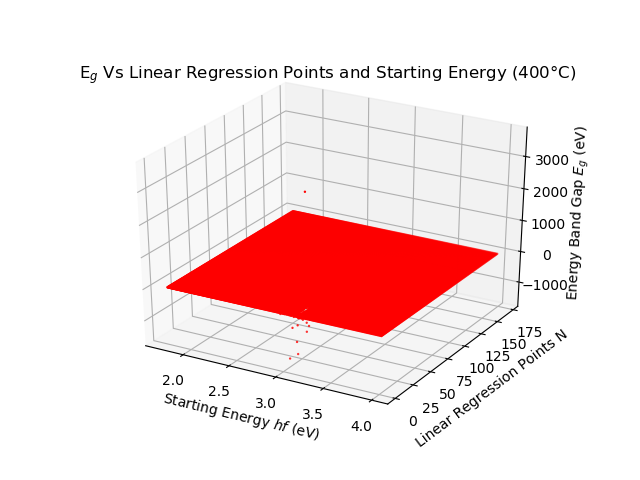

In [11]:
from mpl_toolkits.mplot3d import axes3d
#from matplotlib.pyplot as plt

#Se convierten listas en arreglos para graficar
arr_NumPunReg=np.asarray( arrNumPunReg )
arr_PunIni=np.asarray( arrPunIni )
arr_EneIni=np.asarray( Energia[arrPunIni] )
arr_GabEneOpt=np.asarray( arrGabEneOpt )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#las coordenadas x, y, z son arr_NumPunReg, arr_PunIni y arr_GabEneOpt
ax.scatter(arr_EneIni, arr_NumPunReg, arr_GabEneOpt, c='r', marker='o', s=0.5)#ax.scatter(arr_NumPunReg, arr_EneIni, arr_GabEneOpt, c='r', marker='o', s=0.5)
#Labels de 3 ejes
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=12)
ax.set_xlabel('Starting Energy $hf$ (eV)')#ax.set_xlabel('Linear Regression Points')
ax.set_ylabel('Linear Regression Points N') #'Starting Point'
ax.set_zlabel('Energy Band Gap $E_{g}$ (eV)')
#plt.show()
plt.savefig(Fecha+"_V2O5NoAcu_GapEneOptVsPunRegLin_EneInicio"+Tcal+expNom+ZonEneStr+Formato)

# Mapa de contorno de las graficas 
### (Referencia: https://www.geeksforgeeks.org/matplotlib-pyplot-contourf-in-python/):

<IPython.core.display.Javascript object>


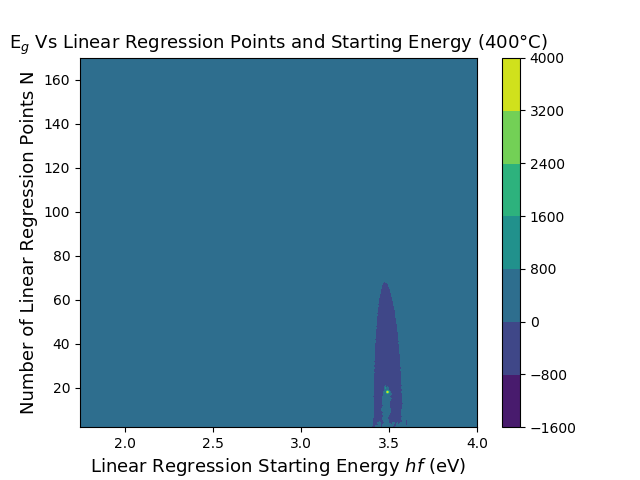

In [12]:
from matplotlib.pyplot import cm
from numpy import ma 
from matplotlib import ticker, cm 

#se convierten listas en arreglos para graficar
arr_NumPunReg=np.asarray( arrNumPunReg )
arr_PunIni=np.asarray( arrPunIni )
arr_EneIni=np.asarray( Energia[arrPunIni] )
arr_GabEneOpt=np.asarray( arrGabEneOpt )

ranNumPunReg=np.linspace(float(numPunRegIni), float(numPun), numPun-numPunRegIni+1) #np.linspace(2.0, float(numPun), numPun-1)
ranNumPunIni=np.linspace(Energia[indPunIni], Energia[indPunIni+numPunIni],  numPunIni)

"""
print("np.shape(ranNumPunReg)=", np.shape(ranNumPunReg), "ranNumPunReg=", ranNumPunReg)
print("np.shape(ranNumPunIni)=", np.shape(ranNumPunIni), "ranNumPunIni=", ranNumPunIni)
print("np.shape(gapEneOpt2D)", np.shape(gapEneOpt2D))
print("gapEneOpt2D=", gapEneOpt2D)
"""

fig = plt.figure()
ax = fig.add_subplot(111)
#las coordenadas x, y, z son arr_NumPunReg, arr_PunIni y arr_GabEneOpt
h = plt.contourf(ranNumPunIni, ranNumPunReg, gapEneOpt2D) 
cbar = plt.colorbar(h)
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=13)
ax.set_xlabel('Linear Regression Starting Energy $hf$ (eV)', size=13)
ax.set_ylabel('Number of Linear Regression Points N', size=13) #'Starting Point'
#ax.set_zlabel('Energy Band Gap (eV)')
#plt.show()
plt.savefig(Fecha+"_V2O5NoAcu_MapContorno_GabEneOptVsPtsRegLin_EnehfIni_"+Tcal+expNom+ZonEneStr+Formato)

# Calculo desviación estándar y error
#### Es mejor usar np.std() denumpy que satistics.stdev() para arreglos 2D
#### Referencia wireframe https://www.youtube.com/watch?v=Zv9a_wMJMe4 ; https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html; https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html ; https://matplotlib.org/3.1.1/gallery/mplot3d/wire3d.html

La zona anaranjada y azul deben aprecer y tal que la anaranjada este adentro de la azul completamente para que use valores correctos
Por favor ingresar indPunRan_i y indEneRan_i minimo en 0 junto con indPunRan_f y indEneRan_f maximo en (169, 400)
indEneRan_i= 122 indEneRan_f= 146 indEneRan_f-indEneRan_i= 24
Energia[indPunIni+indEneRan_i]= 2.8703703703703702 Energia[indPunIni+indEneRan_f]= 2.719298245614035
OJO: indPunRan_i= 10 indPunRan_f= 24
promGapOpt +- sigmaGapOpt= 2.1977605745295548 +- 0.025972625455950672


<IPython.core.display.Javascript object>


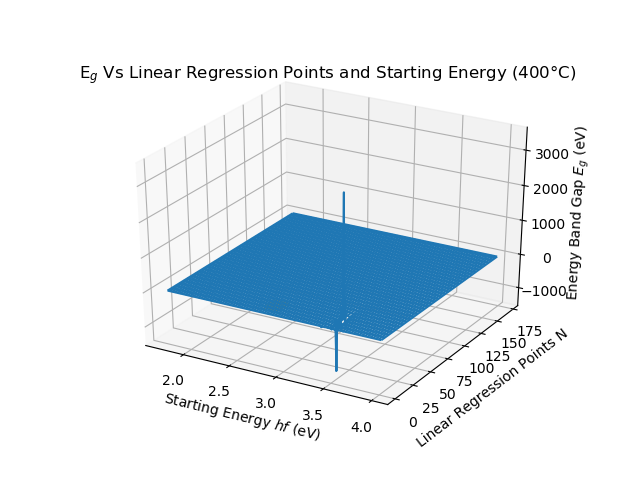

In [13]:
#Ejes para plot_wireframe completo
xWire=np.linspace(Energia[indPunIni], Energia[indPunIni+numPunIni],  numPunIni) #np.arange( 2, numPun+1, 1.0 )
yWire=np.linspace(float(numPunRegIni), float(numPun), numPun-numPunRegIni+1) # np.linspace(2.0, float(numPun), numPun-1)
XWire, YWire= np.meshgrid( xWire, yWire ) #Usar sparse=True?

#Funcion que calcula el valor de ajuste lineal en una energia
def ajusLin(ene):
    return ( slopeTaucMejFil*ene )+interceptTaucMejFil

marErr=0.01 #Margen de error para escoger puntos para graf. 3D y desvi. estandar BajEnergias:0.01 Altenergias:18.0;50.0
#Funcion que da los indices menor y mayor en los que |ajuste-rel.Tauc|<=epsilon
def daIndiceIniYFin(a=indTaucFilIni, b=indTaucFilFin, epsilon=marErr):
    #Lista donde van los indices en los que el |ajuste-rel.Tauc|<=epsilon
    indCer=[]
    #For que verifica en que indices |ajuste-rel.Tauc|<=epsilon
    for i in range( a, b ):
        if np.absolute( ajusLin(Energia[i]) - relTauc[i] )<=epsilon:
            indCer.append(i) 
    indCerArr=np.asarray(indCer) #Se vuelve un arreglo
    #Se obtienen el indice mas grande y mas peque(n)o para retornarlos
    indCerArrMax=np.amax(indCerArr)
    indCerArrMin=np.amin(indCerArr)
    return indCerArrMin, indCerArrMax 

#-------------------------------------
#Ejes para plot_wireframe entre rangos
indEneCer_i, indEneCer_f= 0, 0
if ZonEneStr=="BajEnergias":
    indEneCer_i, indEneCer_f=daIndiceIniYFin()
elif ZonEneStr=="AltEnergias":
    indEneCer_i, indEneCer_f=daIndiceIniYFin(a=indTaucIni)
indEneRan_i=indEneCer_i-indPunIni #9
indEneRan_f=indEneCer_f-indPunIni #42
indPunRan_f=indEneRan_f-indEneRan_i
# Para evitar error
indPunRan_i=0
if indPunRan_f>10:
    indPunRan_i=10
else: 
    indPunRan_i=2
"""
indEneCer_i, indEneCer_f=daIndiceIniYFin()
indEneRan_i=indEneCer_i-indPunIni #9
indEneRan_f=indEneCer_f-indPunIni #42
indPunRan_f=indEneRan_f-indEneRan_i
indPunRan_i=10
"""
    
print("La zona anaranjada y azul deben aprecer y tal que la anaranjada este adentro de la azul completamente para que use valores correctos")
print("Por favor ingresar indPunRan_i y indEneRan_i minimo en 0 junto con indPunRan_f y indEneRan_f maximo en", np.shape(gapEneOpt2D))
print("indEneRan_i=",indEneRan_i,"indEneRan_f=",indEneRan_f, "indEneRan_f-indEneRan_i=", indEneRan_f-indEneRan_i)
print("Energia[indPunIni+indEneRan_i]=",Energia[indPunIni+indEneRan_i],"Energia[indPunIni+indEneRan_f]=",Energia[indPunIni+indEneRan_f])
print("OJO: indPunRan_i=",indPunRan_i, "indPunRan_f=",indPunRan_f)
#-------------------------------------
    
ranGapOpt2D=gapEneOpt2D[indPunRan_i:indPunRan_f, indEneRan_i:indEneRan_f] #rango escogido de gapEneOpt2D
xWireRan=np.linspace( Energia[indPunIni+indEneRan_i], Energia[indPunIni+indEneRan_f], indEneRan_f-indEneRan_i )
yWireRan=np.linspace(indPunRan_i, indPunRan_f, indPunRan_f-indPunRan_i)
XWireRan, YWireRan= np.meshgrid( xWireRan, yWireRan )

"""
print( "np.shape(xWire)=", np.shape(xWire), "np.shape(yWire)=", np.shape(yWire), "np.shape(gapEneOpt2D)=", np.shape(gapEneOpt2D) )
print( "np.shape(xWireRan)=", np.shape(xWireRan), "np.shape(yWireRan)=", np.shape(yWireRan), "np.shape(ranGapOpt2D)=", np.shape(ranGapOpt2D) )
print("xWireRan=", xWireRan, "yWireRan=", yWireRan)
#print("ranGapOpt2D=", ranGapOpt2D)
"""

#-----------------------------------------------------------------
#Calculo de media y desviacion estandar en rango
promGapOpt=np.mean(ranGapOpt2D)
sigmaGapOpt=np.std(ranGapOpt2D)
print("promGapOpt +- sigmaGapOpt=", promGapOpt, "+-", sigmaGapOpt)

#-----------------------------------------------------------------

#grafica plot_wireframe
from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XWire, YWire, gapEneOpt2D, rstride=5, cstride=5) #wireframe completo
ax.plot_wireframe(XWireRan, YWireRan, ranGapOpt2D, rstride=3, cstride=3, color="orange") #wireframe rangos
plt.title('E$_{g}$ Vs Linear Regression Points and Starting Energy ('+Tcal+')', size=12)
ax.set_xlabel('Starting Energy $hf$ (eV)')
ax.set_ylabel('Linear Regression Points N') 
ax.set_zlabel('Energy Band Gap $E_{g}$ (eV)')
#ax.title("Optical Band Gap Selected Lin. Regres. Parameters")?
plt.savefig(Fecha+"_V2O5NoAcu_graf3D_GabEneOptVSPtsRegLin_Ene_hf_Inicio_"+Tcal+expNom+ZonEneStr+Formato)
#plt.show()

# Se produce un archivo TXT con los datos necesarios para graficar todas las muestras juntas
### EneVsTauc_t columanas: col0:long onda, col1:AbsorbanciaA, col2:energia$hf$, col3:relTauc
### resRegLin2D_t columnas: col0:coordenasas ajuste lineal2D en x, col1: coordenadas ajuste lineal 2D en y
### resTcalVsEg_desSta: columanas: col0: $T_{cal}$, col1: $E_{g,FilSG}$, col2: $\sigma_{E_{g}3DFilSG}$, col3: $E_{g,3Dprom}$, col 4: $\sigma_{E_{g}3DFilSG}$, col5: $E_{g,lin_r}$, col6_ $\sigma_{E_{g}3DFilSG}$

In [14]:
#TXT relacion Tauc Vs energia
EneVsTauc=np.block([ [absVsLonOnda[indTaucIni:, 0]], [absVsLonOnda[indTaucIni:, 1]], [Energia[indTaucIni:]], [relTauc[indTaucIni:]] ]) #se agrupan los arreglos
EneVsTauc_t=np.transpose(EneVsTauc) #transponer
"""
print("np.shape(EneVsTauc_t)=", np.shape(EneVsTauc_t))
print("Energia[indTaucIni:]=", Energia[indTaucIni:], "[relTauc[indTaucIni:]=", relTauc[indTaucIni:])
print("EneVsTauc=", EneVsTauc)
print("EneVsTauc_t", EneVsTauc_t)
"""
np.savetxt(Fecha+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+Tcal+expNom+ZonEneStr+".txt", EneVsTauc_t, delimiter='     ') #se guarda en TXT

#TXT ajuste lineal 2D
resRegLin2D=np.block([ [ajuTaucXMejFil], [ajuTaucYMejFil] ])
resRegLin2D_t=np.transpose(resRegLin2D)
np.savetxt(Fecha+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+Tcal+expNom+ZonEneStr+".txt", resRegLin2D_t, delimiter='     ') #se guarda en TXT

#TXT Eg Vs Tcal para los dos metodos de 2D y 3D
resTcalVsEg_desSta=[ float(Tcal[:3]), gapOptLinFil, sigmaGapOpt, promGapOpt, sigmaGapOpt, gapOptLin, sigmaGapOpt]
resTcalVsEg_desSta_t=np.transpose(resTcalVsEg_desSta)
np.savetxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+Tcal+expNom+ZonEneStr+".txt", resTcalVsEg_desSta_t, delimiter='     ') #se guarda en TXT

# Se grafica $T_{cal}$ Vs $E_{g}$ con los TXT anteriores producidos ejecutando a mano para cada temperatura de calcinación, por favor hacerlo así, también por favor ejecutarlos todos con la misma $Fecha$

In [15]:
#Se producen arreglos con info. Tcal Vs Eg para exp2_0Baj
TVsEg_400C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp2_0Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp2_0"+"BajEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp2_0Baj=np.block([ [TVsEg_400C_exp2_0Baj], [TVsEg_425C_exp2_0Baj], [TVsEg_438C_exp2_0Baj], [TVsEg_450C_exp2_0Baj], [TVsEg_475C_exp2_0Baj], [TVsEg_500C_exp2_0Baj] ])
print("TVsEg_exp2_0Baj=", TVsEg_exp2_0Baj)

#---------------------------------------------------------

#Se producen arreglos con info. Tcal Vs Eg para exp0_5Baj
TVsEg_400C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp0_5Baj=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp0_5"+"BajEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp0_5Baj=np.block([ [TVsEg_400C_exp0_5Baj], [TVsEg_425C_exp0_5Baj], [TVsEg_438C_exp0_5Baj], [TVsEg_450C_exp0_5Baj], [TVsEg_475C_exp0_5Baj], [TVsEg_500C_exp0_5Baj] ])
print("TVsEg_exp0_5Baj=", TVsEg_exp0_5Baj)

#---------------------------------------------------------

#Se producen arreglos con info. Tcal Vs Eg para exp2_0Alt
TVsEg_400C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp2_0Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp2_0"+"AltEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp2_0Alt=np.block([ [TVsEg_400C_exp2_0Alt], [TVsEg_425C_exp2_0Alt], [TVsEg_438C_exp2_0Alt], [TVsEg_450C_exp2_0Alt], [TVsEg_475C_exp2_0Alt], [TVsEg_500C_exp2_0Alt] ])

#---------------------------------------------------------
#Se producen arreglos con info. Tcal Vs Eg para exp0_5Alt
TVsEg_400C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"400°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_425C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"425°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_438C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"438°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_450C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"450°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_475C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"475°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")
TVsEg_500C_exp0_5Alt=np.loadtxt(Fecha+"_V2O5NoAcu_TcalVsEg_"+"500°C"+"exp0_5"+"AltEnergias"+".txt", delimiter="     ")

#Se agrupan en un arreglo 2D con np.block estos datos
TVsEg_exp0_5Alt=np.block([ [TVsEg_400C_exp0_5Alt], [TVsEg_425C_exp0_5Alt], [TVsEg_438C_exp0_5Alt], [TVsEg_450C_exp0_5Alt], [TVsEg_475C_exp0_5Alt], [TVsEg_500C_exp0_5Alt] ])


TVsEg_exp2_0Baj= [[4.00000000e+02 2.23554825e+00 2.59726255e-02 2.19776057e+00
  2.59726255e-02 3.80534392e+00 2.59726255e-02]
 [4.25000000e+02 2.09953284e+00 4.07987598e-02 2.05879431e+00
  4.07987598e-02 1.79168391e+00 4.07987598e-02]
 [4.38000000e+02 1.64136645e+00 2.90871221e-02 1.60662826e+00
  2.90871221e-02 1.43262375e+00 2.90871221e-02]
 [4.50000000e+02 1.75548171e+00 4.73384372e-02 1.69121503e+00
  4.73384372e-02 1.35098608e+00 4.73384372e-02]
 [4.75000000e+02 1.47598678e+00 3.34824594e-02 1.43777719e+00
  3.34824594e-02 1.30056351e+00 3.34824594e-02]
 [5.00000000e+02 1.22640691e+00 8.38638314e-03 1.21286016e+00
  8.38638314e-03 1.17617395e+00 8.38638314e-03]]
TVsEg_exp0_5Baj= [[ 4.00000000e+02  5.61030658e-01  3.70748541e-01  2.31795472e-01
   3.70748541e-01  3.29103984e-01  3.70748541e-01]
 [ 4.25000000e+02  3.79162880e-01  7.69734220e-02  2.51951237e-01
   7.69734220e-02  3.76482341e-01  7.69734220e-02]
 [ 4.38000000e+02 -3.45601361e-01  5.73180060e-02 -4.39788922e-01
   5.

<IPython.core.display.Javascript object>


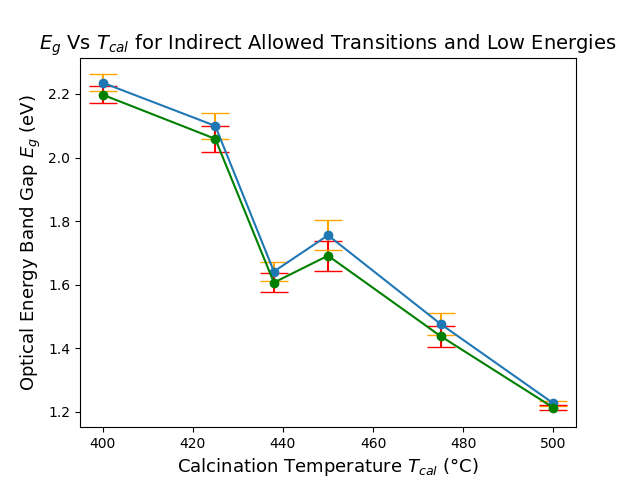

<IPython.core.display.Javascript object>


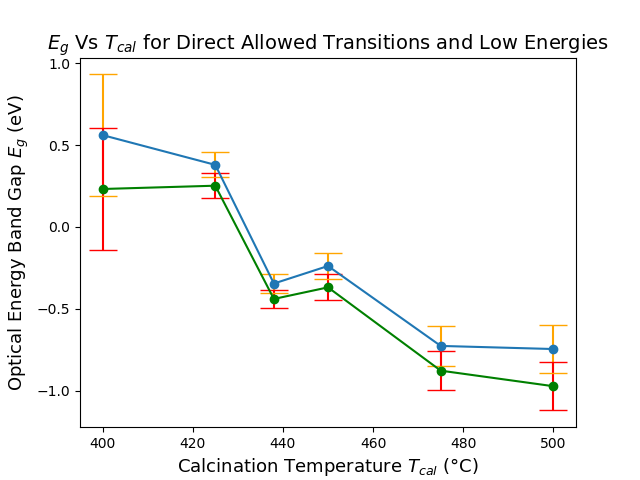

<IPython.core.display.Javascript object>


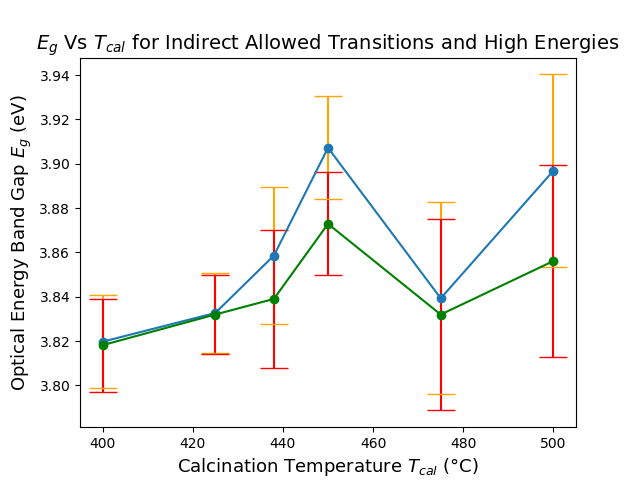

<IPython.core.display.Javascript object>


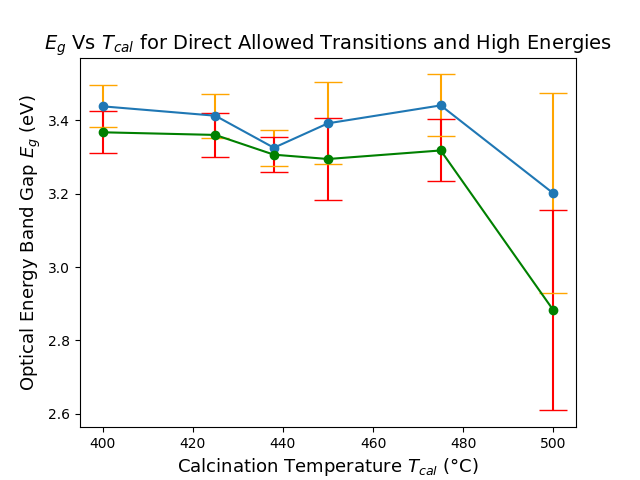

In [16]:
#Se grafica Tcal Vs Eg para exp2_0Baj
plt.figure()
#plt.plot( TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], 'o-' )
#plt.plot( TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], 'o-' , color="orange")
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], yerr=TVsEg_exp2_0Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp2_0"+"BajEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp0_5Baj
plt.figure()
plt.errorbar(TVsEg_exp0_5Baj[:,0], TVsEg_exp0_5Baj[:,1], yerr=TVsEg_exp0_5Baj[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp0_5Baj[:,0], TVsEg_exp0_5Baj[:,3], yerr=TVsEg_exp0_5Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Direct Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp0_5"+"BajEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp2_0Alt
plt.figure()
plt.errorbar(TVsEg_exp2_0Alt[:,0], TVsEg_exp2_0Alt[:,1], yerr=TVsEg_exp2_0Alt[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp2_0Alt[:,0], TVsEg_exp2_0Alt[:,3], yerr=TVsEg_exp2_0Alt[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and High Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
#plt.show()
plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp2_0"+"AltEnergias"+Formato)

#Se grafica Tcal Vs Eg para exp0_5Alt
plt.figure()
plt.errorbar(TVsEg_exp0_5Alt[:,0], TVsEg_exp0_5Alt[:,1], yerr=TVsEg_exp0_5Alt[:,2], marker='o', ecolor="orange", capsize=10)
plt.errorbar(TVsEg_exp0_5Alt[:,0], TVsEg_exp0_5Alt[:,3], yerr=TVsEg_exp0_5Alt[:,4], marker='o', ecolor="red", color="green", capsize=10)
plt.title(r"$E_{g}$ Vs $T_{cal}$ for Direct Allowed Transitions and High Energies", size=14)
plt.xlabel(r"Calcination Temperature $T_{cal}$ (°C)", size=13)
plt.ylabel(r"Optical Energy Band Gap $E_{g}$ (eV)", size=13)
plt.savefig(Fecha+"_V2O5NoAcu_EgVsTcal_"+"exp0_5"+"AltEnergias"+Formato)

def calculaGap(Tcal,indTaucIni=137,expRelTauc=2,indLinIni=230,indLinFin=253,numPunAjuLinTauc=10):
    #Trae datos exprimentales de Tcal dada
    absVsLonOnda=np.loadtxt("2019_Mes9_6_V2O5_"+str(Tcal)[:3]+"C_No_acuosa_Abs.csv", skiprows=2, delimiter=";")
    
    #Para lon onda Vs aborbancia A nx2 retornado 1
    lonVsA=np.block([ [absVsLonOnda[indTaucIni:, 0]], [absVsLonOnda[indTaucIni:, 1]] ]) #se agrupan los arreglos
    lonVsA_t=np.transpose(lonVsA) #transponer para retornar 1
    
    #Para energia hf Vs rel. Tauc 2 arreglos
    groRelTauc=1.0 #1.0 es estandar
    Energia=1240.0/absVsLonOnda[:, 0] #Energia hf de la luz
    relTauc=( ( (2.303/groRelTauc)*absVsLonOnda[:, 1])*Energia  )**expRelTauc # relacion de Tauc y Davit Mott
    #Para energia hf Vs rel. Tauc nx2 retornado 2
    EneVsTauc=np.block([ [Energia[indTaucIni:]], [relTauc[indTaucIni:]] ]) #se agrupan los arreglos
    EneVsTauc_t=np.transpose(EneVsTauc) #transponer para retornar 2
     
    #Para reg. lineal x,y mx2 retornado 3 
    from scipy import stats #Para la regresion lineal se importa
    #-----------------------------------------------
    #Las siguientes dos constates con indices deben encerrar la zona de  interes para el ajuste lineal por Tauc Plot
    """
    indLinIni=230 #230 #indice para hacer el ajuste lineal por Tauc Plot INICIAL
    indLinFin=253 #275  #indice para hacer el ajuste lineal por Tauc Plot FINAL
    numPunAjuLinTauc=10
    """    
    """
    marco=1.5 #distancia de borde alrededor regre. lin.
    completo=False #True: se ven todos datos rel. Tauc ; False: se ve zona regre. lin.
    limVerdes=True #True: muestra rango [indLinIni,indLinFin] con puntos verdes; False: no los muestra
    numPunAjuLinTauc=10 #numero puntos ajuste lineal para tuac plot
    """
    #-----------------------------------------------

    #PARTE PARA ENCONTRAR UNOS BUENOS PUNTOS PARA HACER AJUSTE LINEAL TAUC PLOT
    indLinIniMej=0 #indice para ajuste lineal inicial para hallar el mejor grupo de puntos para este ajuste
    linTaucXMej=[]
    linTaucYMej=[]
    #variables mejores por el momento o definitivas obtenidas del ajuste lineal por el metodo de Tauc plot
    slopeTaucMej=0.0
    interceptTaucMej=0.0
    r_valueTaucMej=0.0 # valor de r para ajuste lineal de relacion de Tauc optimizado el del mejor resultado
    p_valueTaucMej=0.0
    std_errTaucMej=0.0

    for i in range( indLinIni, indLinFin+1 ): #limites por favor seleccionando solamente la zona lineal de interes para el ajuste lienal por Tauc plot
        linTaucXPos=Energia[i:(i+numPunAjuLinTauc)] #linTaucX=Energia[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #linTaucX=Energia[indLinIni:-1][derRelTaucY>minDerTauc]#linTaucX=(Energia[indLinIni:-1][derRelTaucY>minDerTauc])[derRelTaucY<maxDerTauc] #linTaucX=Energia[numEleEmp:-1, 0][derAbsY<-0.01] #arrego con coordenadas donde hacer regresion lineal
        linTaucYPos=relTauc[i:(i+numPunAjuLinTauc)] #linTaucY=relTauc[indLinIni:(indLinFin+1)][derRelTaucY[indLinIni:(indLinFin+1)]>minDerTauc] #arrego con coordenadas donde hacer regresion lineal
        slopeTaucPos, interceptTaucPos, r_valueTaucPos, p_valueTaucPos, std_errTaucPos = stats.linregress(linTaucXPos, linTaucYPos)

        if i == indLinIni:
            indLinIniMej=i 
            linTaucXMej=linTaucXPos
            linTaucYMej=linTaucYPos
            #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
            slopeTaucMej=slopeTaucPos
            interceptTaucMej=interceptTaucPos
            r_valueTaucMej=r_valueTaucPos
            p_valueTaucMej=p_valueTaucPos
            std_errTaucMej=std_errTaucPos

        elif r_valueTaucPos >= r_valueTaucMej:
            indLinIniMej=i #empieza en ind. i con los numPunAjuLinTauc hacia adelante o atras (verificar)
            linTaucXMej=linTaucXPos
            linTaucYMej=linTaucYPos
            #por el momento o tal vez definitivo pone los valores del mejor ajuste lineal por Tauc Plot
            slopeTaucMej=slopeTaucPos
            interceptTaucMej=interceptTaucPos
            r_valueTaucMej=r_valueTaucPos
            p_valueTaucMej=p_valueTaucPos
            std_errTaucMej=std_errTaucPos

    #Ya con los valores del ajuste lineal para Tauc Plot optimizados para hacer el mejor ajuste lineal 
    # estos son los arreglos para graficar el ajuste lineal por metodo de Tauc Plot
    ajuTaucXMej=np.linspace(-interceptTaucMej/slopeTaucMej, Energia[indLinIniMej], 1000) #Diosito por mediante mejoralos Danito bello!!!
    ajuTaucYMej=( slopeTaucMej*ajuTaucXMej )+interceptTaucMej
    gapOptLin=-interceptTaucMej/slopeTaucMej
    errStaGap=0.0 #error estandar de Eg
    #Se hace arreglo m x 2 con coord.s de ajuste lineal retornar 3 
    resRegLin2D=np.block([ [ajuTaucXMej], [ajuTaucYMej] ])
    resRegLin2D_t=np.transpose(resRegLin2D)
    #Se hace arreglo 1 x 3 para retornar 4 y unir con np.block varios
    TcalVsEg=[ float(Tcal), gapOptLin, errStaGap ]
    
     
    return lonVsA_t, EneVsTauc_t, resRegLin2D_t, TcalVsEg 

def grafGap(Tcal,indTaucIni=137,expRelTauc=2,marco=1.5,completo=False,limVerdes=True):
    lonVsAGraf, EneVsTaucGraf=CalculaGap(Tcal,indTaucIni=137,expRelTauc=2,indLinIni=230,indLinFin=253,numPunAjuLinTauc=10)
    
    #Se hacen las graficas
    
    

# 2021_M5_4: Graficas de 3 filas y 2 columnas para documento proyecto grado de absorbancia Vs $\lambda$ y relación de Tauc Vs $hf$

In [17]:
#Variables para guardar info
FechaSubPlot="2021_M2_18_"
expNomSubPlot="exp2_0"

#Se guarda info de .TXTs

#Long onda ; absorbancia A ; energia hf ; rel. Tauc para 6 Tcal con BajEnergias y AltEnergias (12 variables)
LamVsA_EneVsTauc400Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"400°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc425Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"425°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc438Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"438°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc450Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"450°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc475Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"475°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc500Baj=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"500°C"+expNomSubPlot+"BajEnergias"+".txt", delimiter="     ")

#--------------------------------
#Long Onda y Absorbancia junto a energia hf y rel. Tauc es el mismo con "BajEnergias" y "AltEnergias"! 
#>>> Algo bueno Gracias a Diosito Hermoso y Bello con Mamita María y el Cielo
#--------------------------------

print("np.shape(LamVsA_EneVsTauc400Baj)=", np.shape(LamVsA_EneVsTauc400Baj), "LamVsA_EneVsTauc400Baj=", LamVsA_EneVsTauc400Baj)

np.shape(LamVsA_EneVsTauc400Baj)= (791, 4) LamVsA_EneVsTauc400Baj= [[3.10000000e+02 2.26300000e+00 4.00000000e+00 4.34587236e+02]
 [3.11000000e+02 2.18730000e+00 3.98713826e+00 4.03391901e+02]
 [3.12000000e+02 2.11180000e+00 3.97435897e+00 3.73617861e+02]
 ...
 [1.09800000e+03 8.89000000e-02 1.12932605e+00 5.34601395e-02]
 [1.09900000e+03 8.87000000e-02 1.12829845e+00 5.31230622e-02]
 [1.10000000e+03 8.85000000e-02 1.12727273e+00 5.27876608e-02]]


## Gráficas

<IPython.core.display.Javascript object>


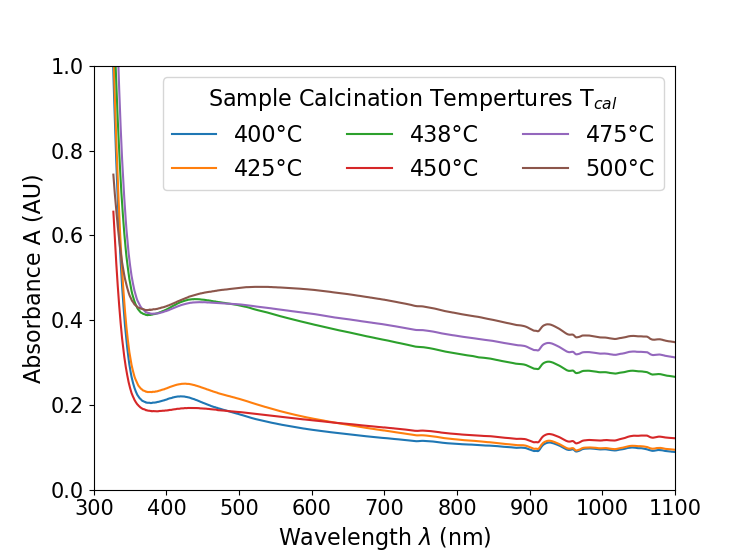

In [18]:
#Variables de graficas

plt.figure(figsize=[7.5, 5.5])
plt.plot( LamVsA_EneVsTauc400Baj[:,0], LamVsA_EneVsTauc400Baj[:,1], label=r"400°C" ) #400°C
plt.plot( LamVsA_EneVsTauc425Baj[:,0], LamVsA_EneVsTauc425Baj[:,1], label=r"425°C" ) #425°C
plt.plot( LamVsA_EneVsTauc438Baj[:,0], LamVsA_EneVsTauc438Baj[:,1], label=r"438°C" ) #438°C se sobrepone con 400°C
plt.plot( LamVsA_EneVsTauc450Baj[:,0], LamVsA_EneVsTauc450Baj[:,1], label=r"450°C" ) #450°C
plt.plot( LamVsA_EneVsTauc475Baj[:,0], LamVsA_EneVsTauc475Baj[:,1], label=r"475°C" ) #475°C
plt.plot( LamVsA_EneVsTauc500Baj[:,0], LamVsA_EneVsTauc500Baj[:,1], label=r"500°C" ) #500°C
plt.xlim(300.0, 1100.0)
plt.ylim(0.0, 1.0)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=16)
plt.ylabel(r"Absorbance A (AU)", size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=0, title=r"Sample Calcination Tempertures T$_{cal}$", title_fontsize=16, ncol=3, fontsize=16)
#plt.show()
plt.savefig("2021_M5_6_V2O5NoAcu_AbsorVsLonOnda6Tcal.pdf", bbox_inches='tight')

#--------------------
#Subplot de long. onda Vs absorbancia A para 6 Tcal (BajEnergias=AltEnergias)
#--------------------

#Variables de graficas
limXIni2_0Baj=200.0
limXFin2_0Baj=1200.0

plt.figure(1, figsize=[10.0, 14.0]) #figsize=[14.0, 12.0]

#REVISAR SI COINCIDEN Tcal!!!!!!!!

#400°C
plt.subplot(321)
plt.plot( LamVsA_EneVsTauc400Baj[:,0], LamVsA_EneVsTauc400Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(a)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Absorbance $A$", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#425°C
plt.subplot(323)
plt.plot( LamVsA_EneVsTauc425Baj[:,0], LamVsA_EneVsTauc425Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(b)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Absorbance $A$", size=15)
plt.text(800.0, 0.9, "          425°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#438°C
plt.subplot(325)
plt.plot( LamVsA_EneVsTauc438Baj[:,0], LamVsA_EneVsTauc438Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(c)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Absorbance $A$", size=15)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#450°C
plt.subplot(322)
plt.plot( LamVsA_EneVsTauc450Baj[:,0], LamVsA_EneVsTauc450Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(d)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#475°C
plt.subplot(324)
plt.plot( LamVsA_EneVsTauc475Baj[:,0], LamVsA_EneVsTauc475Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(e)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#500°C
plt.subplot(326)
plt.plot( LamVsA_EneVsTauc500Baj[:,0], LamVsA_EneVsTauc500Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(f)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("2021_M5_4_V2O5NoAcuAbsorAVsLonOnda6Tcal.pdf", bbox_inches='tight')

# Gráfica absorbancia A Vs long. onda $\lambda$
#### intento para evitar:  MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<IPython.core.display.Javascript object>


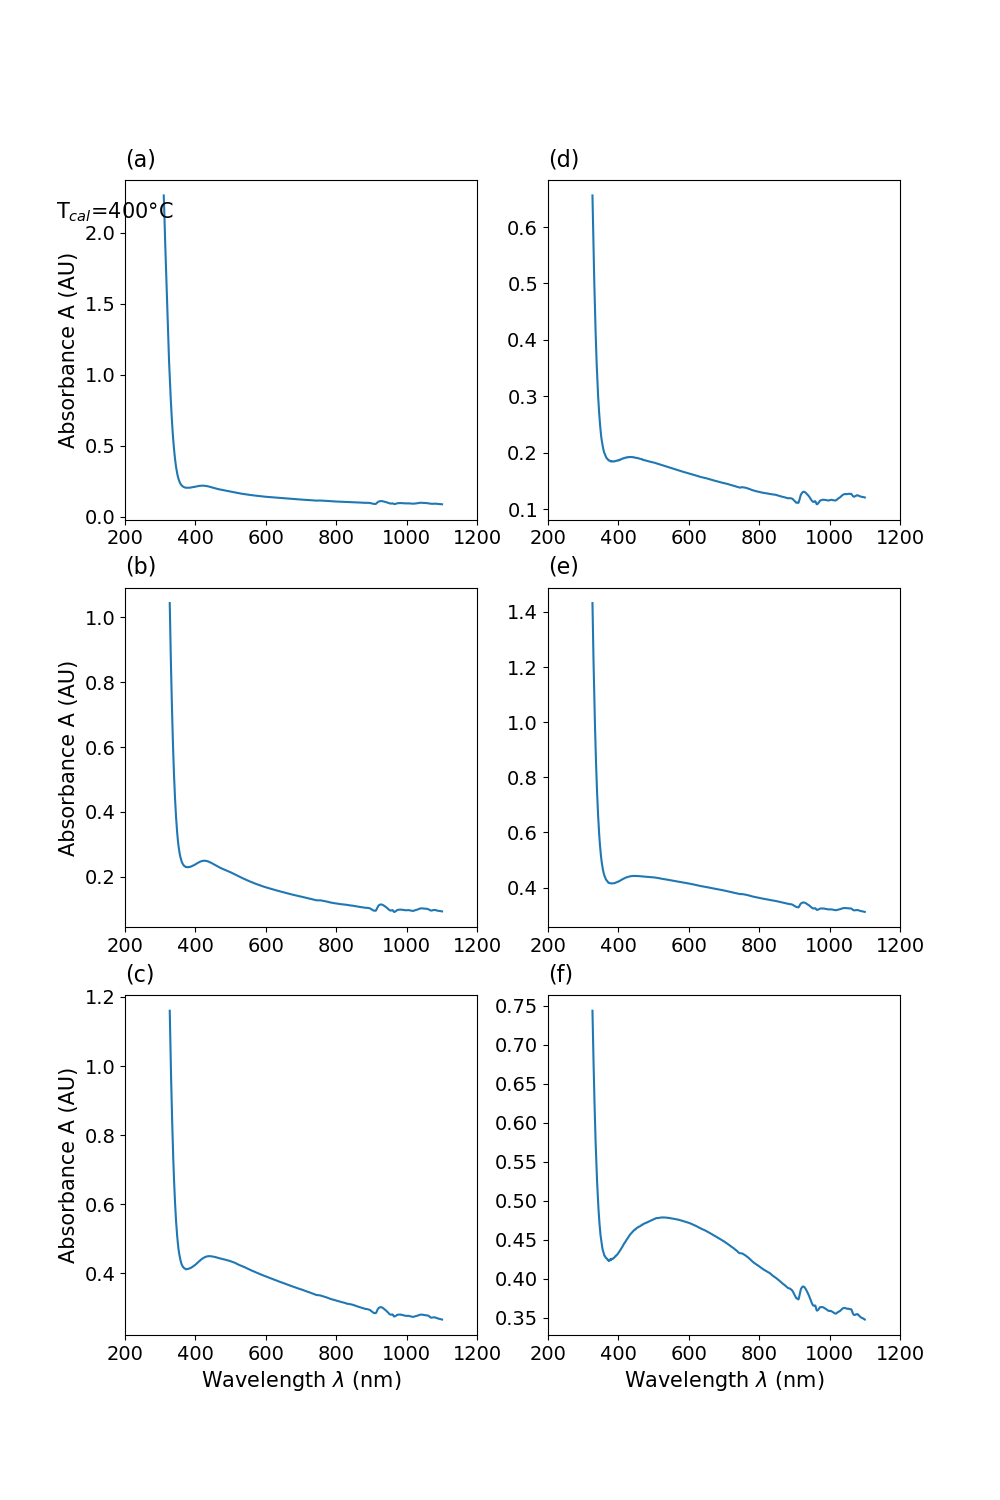

In [19]:
#--------------------
#Subplot de long. onda Vs absorbancia A para 6 Tcal (BajEnergias=AltEnergias)
#--------------------

#Variables de graficas
limXIni2_0Baj=200.0
limXFin2_0Baj=1200.0

plt.figure(figsize=[10.0, 15.0]) #plt.figure(1, figsize=[10.0, 14.0]) #figsize=[14.0, 12.0]

#REVISAR SI COINCIDEN Tcal!!!!!!!!

#400°C
ax1 = plt.subplot(3,2,1)
ax1.plot( LamVsA_EneVsTauc400Baj[:,0], LamVsA_EneVsTauc400Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(a)", loc='left', size=16, pad=10.0)
plt.ylabel("Absorbance A (AU)", size=15)
plt.text(3.75, 2.1, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#425°C
ax2 = plt.subplot(3,2,3)
ax2.plot( LamVsA_EneVsTauc425Baj[:,0], LamVsA_EneVsTauc425Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(b)", loc='left', size=16, pad=10.0)
plt.ylabel("Absorbance A (AU)", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#438°C
ax3 = plt.subplot(3,2,5)
ax3.plot( LamVsA_EneVsTauc438Baj[:,0], LamVsA_EneVsTauc438Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(c)", loc='left', size=16, pad=10.0)
plt.ylabel("Absorbance A (AU)", size=15)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#450°C
ax4 = plt.subplot(3,2,2)
ax4.plot( LamVsA_EneVsTauc450Baj[:,0], LamVsA_EneVsTauc450Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(d)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#475°C
ax5 = plt.subplot(3,2,4)
ax5.plot( LamVsA_EneVsTauc475Baj[:,0], LamVsA_EneVsTauc475Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(e)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#500°C
ax6 = plt.subplot(3,2,6)
ax6.plot( LamVsA_EneVsTauc500Baj[:,0], LamVsA_EneVsTauc500Baj[:,1] )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.title("(f)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.xlabel(r"Wavelength $\lambda$ (nm)", size=15)
#plt.text(900.0, 0.8, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.show()
plt.savefig("2021_M5_4_V2O5NoAcuAbsorAVsLonOnda6Tcal.pdf", bbox_inches='tight')

# Gráficas de relación de Tauc Vs energía $hf$

## Para graficarlas con la reg. lineal primero se trae la esta info. de estas regresiones lineales

In [20]:
#Variables para guardar info
FechaRegLinTaucVsEne="2021_M2_18_"
expNomRegLinTaucVsEne="exp2_0"

#Se guarda info de .TXTs

# ajuTaucXMejFil ; ajuTaucYMejFil con exp2_0 para 6 Tcal con BajEnergias y AltEnergias (12 variables)
ajuLinTaucFil_400exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"400°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_425exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"425°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_438exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"438°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_450exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"450°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_475exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"475°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_500exp2_0Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"500°C"+expNomRegLinTaucVsEne+"BajEnergias"+".txt", delimiter="     ")

print("np.shape(ajuLinTaucFil_400exp2_0Baj)=", np.shape(ajuLinTaucFil_400exp2_0Baj), "ajuLinTaucFil_400exp2_0Baj=", ajuLinTaucFil_400exp2_0Baj)

np.shape(ajuLinTaucFil_400exp2_0Baj)= (1000, 2) ajuLinTaucFil_400exp2_0Baj= [[ 2.23554825e+00 -8.88178420e-16]
 [ 2.23614435e+00  1.93836178e-03]
 [ 2.23674045e+00  3.87672355e-03]
 ...
 [ 2.82985803e+00  1.93254669e+00]
 [ 2.83045413e+00  1.93448505e+00]
 [ 2.83105023e+00  1.93642341e+00]]


<IPython.core.display.Javascript object>


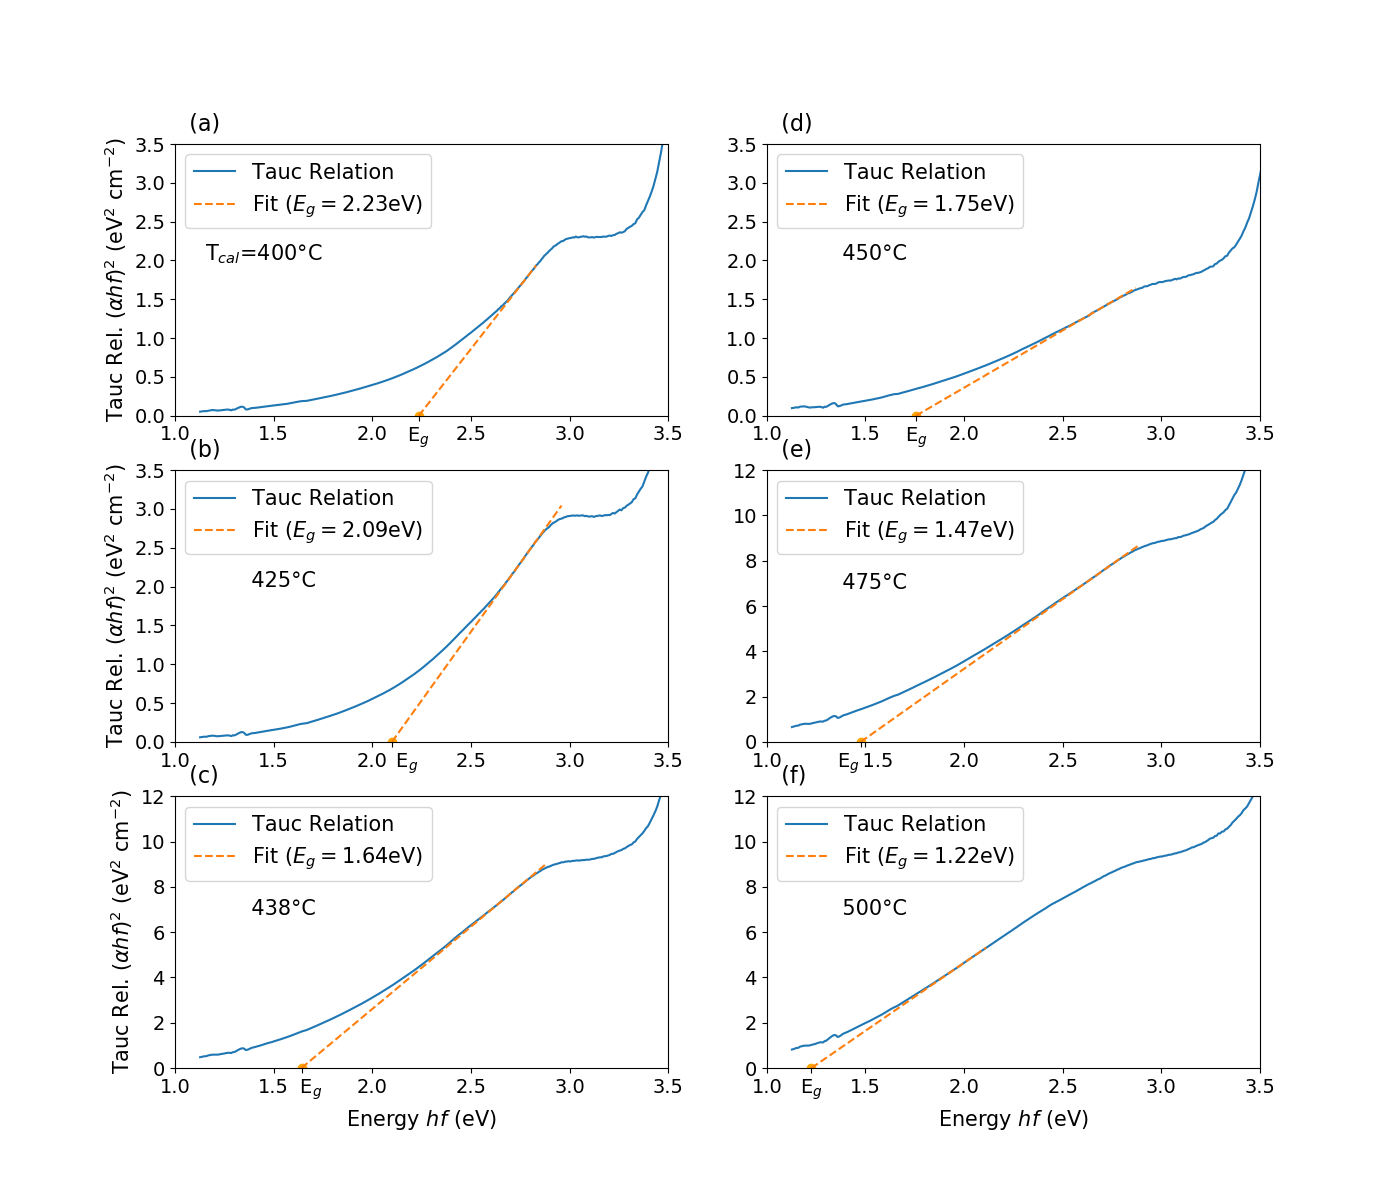

In [21]:
#--------------------
#Subplot de long. onda Vs absorbancia A para 6 Tcal (BajEnergias=AltEnergias)
#--------------------

#Variables de graficas
limXIni2_0Baj=1.0
limXFin2_0Baj=3.5
#Gap energias opticos tipo float y string
numCifSigGapOpt=4
gapOptFil400C=ajuLinTaucFil_400exp2_0Baj[0,0]
gapOptFil400CStr=( str(gapOptFil400C)[:numCifSigGapOpt] )+"eV"
gapOptFil425C=ajuLinTaucFil_425exp2_0Baj[0,0]
gapOptFil425CStr=( str(gapOptFil425C)[:numCifSigGapOpt] )+"eV"
gapOptFil438C=ajuLinTaucFil_438exp2_0Baj[0,0]
gapOptFil438CStr=( str(gapOptFil438C)[:numCifSigGapOpt] )+"eV"
gapOptFil450C=ajuLinTaucFil_450exp2_0Baj[0,0]
gapOptFil450CStr=( str(gapOptFil450C)[:numCifSigGapOpt] )+"eV"
gapOptFil475C=ajuLinTaucFil_475exp2_0Baj[0,0]
gapOptFil475CStr=( str(gapOptFil475C)[:numCifSigGapOpt] )+"eV"
gapOptFil500C=ajuLinTaucFil_500exp2_0Baj[0,0]
gapOptFil500CStr=( str(gapOptFil500C)[:numCifSigGapOpt] )+"eV"


plt.figure(figsize=[14.0, 12.0]) #plt.figure(1, figsize=[10.0, 14.0]) #figsize=[14.0, 12.0] ; REL tAUC vS HF: figsize=[10.0, 15.0]

#REVISAR SI COINCIDEN Tcal!!!!!!!!

#400°C
ax1 = plt.subplot(3,2,1)
ax1.plot( LamVsA_EneVsTauc400Baj[:,2], LamVsA_EneVsTauc400Baj[:,3], label="Tauc Relation" )
ax1.plot( ajuLinTaucFil_400exp2_0Baj[:,0], ajuLinTaucFil_400exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil400CStr+")" )
ax1.scatter( [gapOptFil400C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 3.5)
plt.title("  (a)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=15)
plt.text(1.15, 2.0, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, 1.5, 2.0, gapOptFil400C, 2.5, 3.0, 3.5], ["1.0", "1.5", "2.0", "E$_{g}$", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#425°C
ax2 = plt.subplot(3,2,3)
ax2.plot( LamVsA_EneVsTauc425Baj[:,2], LamVsA_EneVsTauc425Baj[:,3], label="Tauc Relation" )
ax2.plot( ajuLinTaucFil_425exp2_0Baj[:,0], ajuLinTaucFil_425exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil425CStr+")" )
ax2.scatter( [gapOptFil425C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 3.5)
plt.title("  (b)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=15)
plt.text(1.15, 2.0, "       425°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, 1.5, 2.0, gapOptFil425C, 2.5, 3.0, 3.5], ["1.0", "1.5", "2.0", "     E$_{g}$", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#438°C
ax3 = plt.subplot(3,2,5)
ax3.plot( LamVsA_EneVsTauc438Baj[:,2], LamVsA_EneVsTauc438Baj[:,3], label="Tauc Relation" )
ax3.plot( ajuLinTaucFil_438exp2_0Baj[:,0], ajuLinTaucFil_438exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil438CStr+")" )
ax3.scatter( [gapOptFil438C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 12.0)
plt.title("  (c)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=15)
plt.xlabel(r"Energy $hf$ (eV)", size=15)
plt.text(1.15, 6.75, "       438°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, 1.5, gapOptFil438C, 2.0, 2.5, 3.0, 3.5], ["1.0", "1.5", "   E$_{g}$", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#450°C
ax4 = plt.subplot(3,2,2)
ax4.plot( LamVsA_EneVsTauc450Baj[:,2], LamVsA_EneVsTauc450Baj[:,3], label="Tauc Relation" )
ax4.plot( ajuLinTaucFil_450exp2_0Baj[:,0], ajuLinTaucFil_450exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil450CStr+")" )
ax4.scatter( [gapOptFil450C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 3.5)
plt.title("  (d)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.text(1.15, 2.0, "       450°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, 1.5, gapOptFil450C, 2.0, 2.5, 3.0, 3.5], ["1.0", "1.5", "E$_{g}$", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#475°C
ax5 = plt.subplot(3,2,4)
ax5.plot( LamVsA_EneVsTauc475Baj[:,2], LamVsA_EneVsTauc475Baj[:,3], label="Tauc Relation" )
ax5.plot( ajuLinTaucFil_475exp2_0Baj[:,0], ajuLinTaucFil_475exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil475CStr+")" )
ax5.scatter( [gapOptFil475C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 12.0)
plt.title("  (e)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.text(1.15, 6.75, "       475°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, gapOptFil475C, 1.5, 2.0, 2.5, 3.0, 3.5], ["1.0", "E$_{g}$     ", "    1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#500°C
ax6 = plt.subplot(3,2,6)
ax6.plot( LamVsA_EneVsTauc500Baj[:,2], LamVsA_EneVsTauc500Baj[:,3], label="Tauc Relation" )
ax6.plot( ajuLinTaucFil_500exp2_0Baj[:,0], ajuLinTaucFil_500exp2_0Baj[:,1], '--', label="Fit "+r"($E_{g}=$"+gapOptFil500CStr+")" )
ax6.scatter( [gapOptFil500C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 12.0)
plt.title("  (f)", loc='left', size=16, pad=10.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.xlabel(r"Energy $hf$ (eV)", size=15)
plt.text(1.15, 6.75, "       500°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([1.0, gapOptFil500C, 1.5, 2.0, 2.5, 3.0, 3.5], ["1.0", "E$_{g}$", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=15)

#plt.show()
plt.savefig("2021_M5_6_V2O5NoAcuRelTaucVsEne6Tcal.pdf", bbox_inches='tight')

# 2021_M5_7: Gap de energía óptico en  función de temperatura de calcinación E$_{g}$ Vs T$_{cal}$ para E$_{g}$ entre 1 y 2.5 eV con transición INDIRECTA

<IPython.core.display.Javascript object>


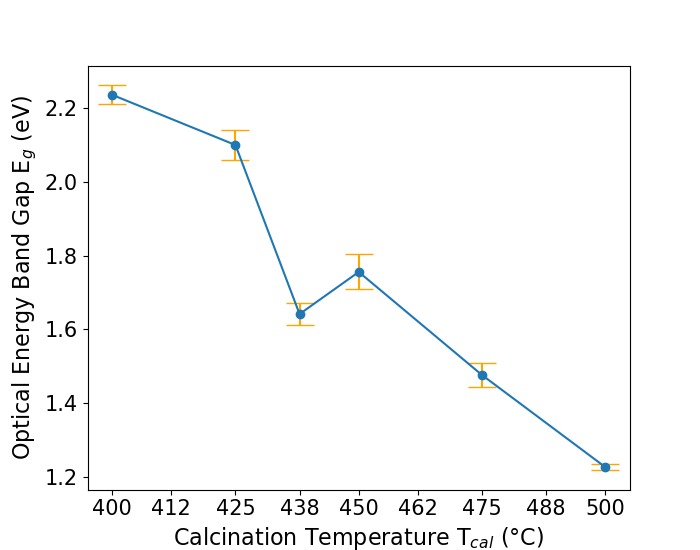

In [22]:
plt.figure(figsize=[7.0, 5.5])
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10)
#plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], yerr=TVsEg_exp2_0Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
#plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature T$_{cal}$ (°C)", size=16)
plt.ylabel(r"Optical Energy Band Gap E$_{g}$ (eV)", size=16)
plt.xticks([400.0, 412, 425.0, 438.0, 450.0, 462.0, 475.0, 488.0, 500.0], ["400", "412", "425", "438", "450", "462", "475", "488", "500"], fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(loc=0)

#plt.show()
plt.savefig("2021_M5_7"+"_V2O5NoAcu_DefEgVsTcal_"+"exp2_0"+"BajEnergias"+Formato, bbox_inches='tight')

# 2021_M6_28: Poner regresión llineal sobre E$_{g}$ Vs T$_{cal}$

In [23]:
#Lista con indices entre 0,1,2,3,4,5 para escoger los puntos de Eg Vs Tcal a 
#usar en regracion lineal de decrecimeinto atribuido a vacancias de oxigenos
#vandiles
indEgVsTcal_DecVac=[1,3,4,5]

#pruebas para identificar
print( "TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1]=respectivamente a", TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1] )
print( "Modificados TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1]=respectivamente a", TVsEg_exp2_0Baj[indEgVsTcal_DecVac,0], TVsEg_exp2_0Baj[indEgVsTcal_DecVac,1] )

#Para considerar aproximadamente el decrecimeinto de Eg con Tcal desde 400 hasta 500 C 
#como una linea recta con su regresion lineal se ponen estos dos arreglos o listas
TVsEg_exp2_0Baj_DecVacX=TVsEg_exp2_0Baj[indEgVsTcal_DecVac,0]
TVsEg_exp2_0Baj_DecVacY=TVsEg_exp2_0Baj[indEgVsTcal_DecVac,1]

#Regresion lineal para aproxiamdamente describir el descenso de Eg Vs Tcal
#luego de ahí se estima Diosito por mediante la contribucion estructural
slopeDecVac, interceptDecVac, r_valueDecVac, p_valueDecVac, std_errDecVac = stats.linregress( TVsEg_exp2_0Baj_DecVacX, TVsEg_exp2_0Baj_DecVacY )

TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1]=respectivamente a [400. 425. 438. 450. 475. 500.] [2.23554825 2.09953284 1.64136645 1.75548171 1.47598678 1.22640691]
Modificados TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1]=respectivamente a [425. 450. 475. 500.] [2.09953284 1.75548171 1.47598678 1.22640691]


Entre reg lineal de descencso por vacancias y valor obtenido experimentalmente pot el metodo de Tauc con Filtro SG
EgRegLin438C_DesVac-EgTaucFilSG438C= 0.282075137165255
EgRegLin438C_DesVac= 1.9234415868407515


<IPython.core.display.Javascript object>


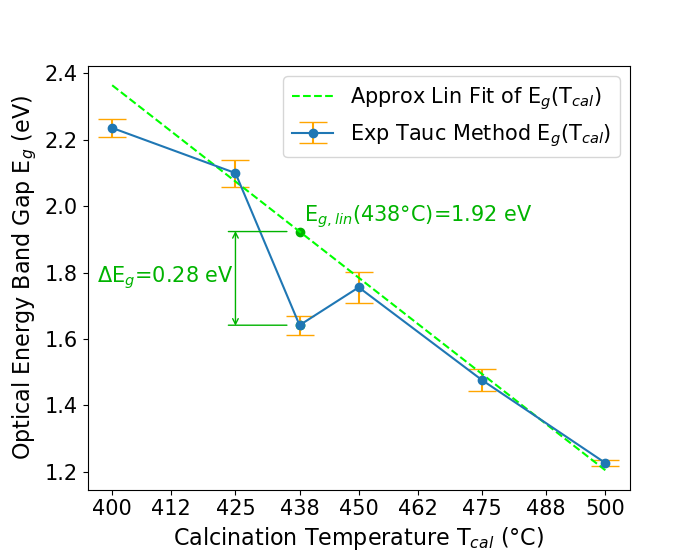

In [24]:
#Para graficar ajuste lineal que decribe Diosito por mediante
#descenso de Eg Vs Tcal atribuido a vacanicias de oxigeno
ajuLinDesVacX=np.linspace( TVsEg_exp2_0Baj[0,0], TVsEg_exp2_0Baj[5,0], 1000  )
ajuLinDesVacY=( slopeDecVac*ajuLinDesVacX )+( interceptDecVac )

#Para diferencia entre regresion lineal de descenso vacaiancias O1
EgRegLin438C_DesVac=( slopeDecVac*438.0 )+( interceptDecVac )
EgTaucFilSG438C=TVsEg_exp2_0Baj[2,1]
print( "Entre reg lineal de descencso por vacancias y valor obtenido experimentalmente pot el metodo de Tauc con Filtro SG" )
print( "EgRegLin438C_DesVac-EgTaucFilSG438C=", EgRegLin438C_DesVac-EgTaucFilSG438C )
print("EgRegLin438C_DesVac=", EgRegLin438C_DesVac )
EgDesVacYExpTauc=r"$\Delta$E$_{g}$="+ str(EgRegLin438C_DesVac-EgTaucFilSG438C)[:4] + " eV"
EgDesVacStr=r"E$_{g, lin}$(438°C)="+str(EgRegLin438C_DesVac)[:4]+" eV"


#Graficar todo junto
plt.figure(figsize=[7.0, 5.5])
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10, label="Exp Tauc Method E$_{g}$(T$_{cal}$)")
plt.plot( ajuLinDesVacX, ajuLinDesVacY, '--', color=(0.0,1.0,0.0), label="Approx Lin Fit of E$_{g}$(T$_{cal}$)" )
plt.scatter( [438.0, 438.0], [EgRegLin438C_DesVac, EgTaucFilSG438C], color=(0.0,0.7,0.0)  )
#plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], yerr=TVsEg_exp2_0Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
#plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature T$_{cal}$ (°C)", size=16)
plt.ylabel(r"Optical Energy Band Gap E$_{g}$ (eV)", size=16)
plt.xticks([400.0, 412, 425.0, 438.0, 450.0, 462.0, 475.0, 488.0, 500.0], ["400", "412", "425", "438", "450", "462", "475", "488", "500"], fontsize=15)
plt.yticks(fontsize=15)
plt.annotate("", xy=(425.0, EgRegLin438C_DesVac+0.01), xytext=(425.0, EgTaucFilSG438C-0.01), arrowprops=dict(arrowstyle="<->", color=(0.0,0.7,0.0)))
plt.annotate("", xy=(423.0, EgRegLin438C_DesVac), xytext=(436.0, EgRegLin438C_DesVac), arrowprops=dict(arrowstyle="-", color=(0.0,0.7,0.0)))
plt.annotate("", xy=(423.0, EgTaucFilSG438C), xytext=(436.0, EgTaucFilSG438C), arrowprops=dict(arrowstyle="-", color=(0.0,0.7,0.0)))
plt.text(397.0, 1.77, EgDesVacYExpTauc, fontsize=15.0, fontweight=525, color=(0.0,0.7,0.0) )
plt.text(439.0, EgRegLin438C_DesVac+0.03, EgDesVacStr, fontsize=15.0, fontweight=525, color=(0.0,0.7,0.0) )
plt.legend(loc='upper right', fontsize=15.0)
#plt.show()
plt.savefig("2021_M6_28"+"_V2O5NoAcu_DefEgVsTcal_"+"exp2_0"+"BajEnergias"+Formato, bbox_inches='tight')

# 2021_M6_14: Diosito mio: gráfica de 425C para gráfica de E$-{g}$(N, starting energy hf) en documento Diosito por mediante

<IPython.core.display.Javascript object>


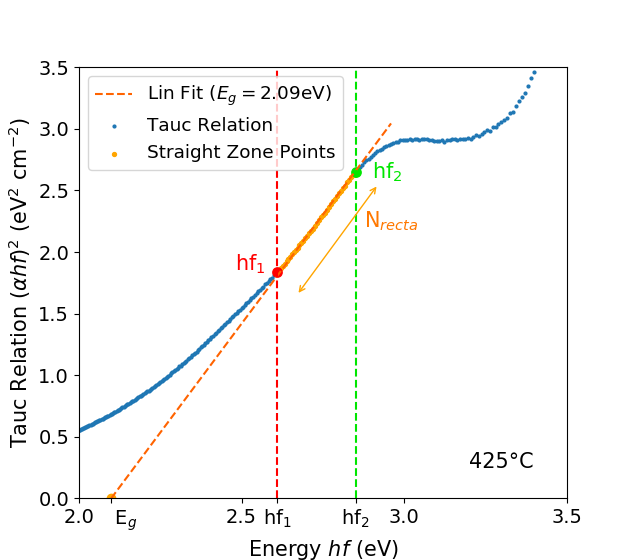

'"\nprint( "np.shape(LamVsA_EneVsTauc425Baj[:,2])=", np.shape(LamVsA_EneVsTauc425Baj[:,2]), "LamVsA_EneVsTauc425Baj[:,2]=", LamVsA_EneVsTauc425Baj[:,2])\nprint( "np.shape(LamVsA_EneVsTauc425Baj[:,3])=", np.shape(LamVsA_EneVsTauc425Baj[:,3]), "LamVsA_EneVsTauc425Baj[:,3]=", LamVsA_EneVsTauc425Baj[:,3] )\n'

In [25]:
pun3DIni=108
pun3DFin=148

plt.figure(figsize=[6.3, 5.6])
plt.scatter( LamVsA_EneVsTauc425Baj[:,2], LamVsA_EneVsTauc425Baj[:,3], label="Tauc Relation", s=4.0 )
plt.scatter( LamVsA_EneVsTauc425Baj[pun3DIni:pun3DFin, 2], LamVsA_EneVsTauc425Baj[pun3DIni:pun3DFin,3], s=8.0, label="Straight Zone Points", color="orange" )
plt.plot( ajuLinTaucFil_425exp2_0Baj[:,0], ajuLinTaucFil_425exp2_0Baj[:,1], '--', label="Lin Fit "+r"($E_{g}=$"+gapOptFil425CStr+")", color=(1.0,0.39,0.0) )
plt.scatter( [gapOptFil425C], [0.0], color="orange" )
#plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.xlim(2.0, 3.5)
plt.ylim(0.0, 3.5)
#plt.title("  (b)", loc='left', size=16, pad=10.0)
plt.ylabel(r"Tauc Relation "+r"$(\alpha hf)^{"+"2"+r"}$"+" (eV$^{2}$ cm$^{-2}$)", size=15)
plt.xlabel(r"Energy $hf$ (eV)", size=15)
plt.xticks([2.0, gapOptFil425C, 2.5, LamVsA_EneVsTauc425Baj[pun3DFin,2], LamVsA_EneVsTauc425Baj[pun3DIni,2], 3.0, 3.5], [ "2.0", "     E$_{g}$", "2.5", r"hf$_{1}$", r"hf$_{2}$", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=13.3)
plt.text(3.2, 0.25, "425°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.text(2.9, 2.6, r"hf$_{2}$", fontsize=15.0, fontweight=525, color=(0.0,0.9,0.0) )
plt.scatter( [ LamVsA_EneVsTauc425Baj[pun3DIni,2] ], [ LamVsA_EneVsTauc425Baj[pun3DIni,3] ], color=(0.0,0.9,0.0), s=45.0 )
plt.axvline(x=LamVsA_EneVsTauc425Baj[pun3DIni,2], color=(0.0,0.9,0.0), linestyle="--")
plt.text(2.48, 1.85, r"hf$_{1}$", fontsize=15.0, fontweight=525, color=(1.0,0.0,0.0) )
plt.scatter( [ LamVsA_EneVsTauc425Baj[pun3DFin,2] ], [ LamVsA_EneVsTauc425Baj[pun3DFin,3] ], color=(1.0,0.0,0.0), s=45.0 )
plt.axvline(x=LamVsA_EneVsTauc425Baj[pun3DFin,2], color=(1.0,0.0,0.0), linestyle="--")
plt.text(2.875, 2.2, r"N$_{recta}$", fontsize=15.0, fontweight=525, color=(1.0,0.47,0.0) )
#plt.arrow( 2.67, 1.8, 0.23, 0.85, color=(1.0,0.47,0.0), shape="right")
plt.annotate("", xy=(2.92, 2.55), xytext=(2.67, 1.65), arrowprops=dict(arrowstyle="<->", color="orange"))
#plt.show()
plt.savefig("2021_M6_14_V2O5NoAcu425C_graf3D_RelTaucVsEnehfExplic.pdf", bbox_inches='tight')

""""
print( "np.shape(LamVsA_EneVsTauc425Baj[:,2])=", np.shape(LamVsA_EneVsTauc425Baj[:,2]), "LamVsA_EneVsTauc425Baj[:,2]=", LamVsA_EneVsTauc425Baj[:,2])
print( "np.shape(LamVsA_EneVsTauc425Baj[:,3])=", np.shape(LamVsA_EneVsTauc425Baj[:,3]), "LamVsA_EneVsTauc425Baj[:,3]=", LamVsA_EneVsTauc425Baj[:,3] )
"""

# 2021_M7_1: Diosito mio: Gráficas rel. Tauc indirecta (n=1/2) Vs hf para mostrar valor máximo que podría tomar E$_{g}$ indirecto en el documento

In [26]:
#Variables para guardar info
FechaSubPlot="2021_M2_18_"
expNomSubPlotexp0_5="exp0_5"

#Se guarda info de .TXTs

#Long onda ; absorbancia A ; energia hf ; rel. Tauc para 6 Tcal con BajEnergias y AltEnergias (12 variables)
LamVsA_EneVsTauc400Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"400°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc425Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"425°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc438Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"438°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc450Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"450°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc475Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"475°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")
LamVsA_EneVsTauc500Bajexp0_5=np.loadtxt(FechaSubPlot+"V2O5NoAcu_RelTaucPlotVsEnergiaLuzLaser_"+"500°C"+expNomSubPlotexp0_5+"BajEnergias"+".txt", delimiter="     ")

#--------------------------------
#Long Onda y Absorbancia junto a energia hf y rel. Tauc es el mismo con "BajEnergias" y "AltEnergias"! 
#>>> Algo bueno Gracias a Diosito Hermoso y Bello con Mamita María y el Cielo
#--------------------------------

print("np.shape(LamVsA_EneVsTauc400Bajexp0_5)=", np.shape(LamVsA_EneVsTauc400Bajexp0_5), "LamVsA_EneVsTauc400Bajexp0_5=", LamVsA_EneVsTauc400Bajexp0_5)

np.shape(LamVsA_EneVsTauc400Bajexp0_5)= (791, 4) LamVsA_EneVsTauc400Bajexp0_5= [[3.10000000e+02 2.26300000e+00 4.00000000e+00 4.56582479e+00]
 [3.11000000e+02 2.18730000e+00 3.98713826e+00 4.48158661e+00]
 [3.12000000e+02 2.11180000e+00 3.97435897e+00 4.39649828e+00]
 ...
 [1.09800000e+03 8.89000000e-02 1.12932605e+00 4.80847677e-01]
 [1.09900000e+03 8.87000000e-02 1.12829845e+00 4.80087917e-01]
 [1.10000000e+03 8.85000000e-02 1.12727273e+00 4.79328337e-01]]


In [27]:
#Variables para guardar info
FechaRegLinTaucVsEne="2021_M2_18_"
expNomRegLinTaucVsEneexp0_5="exp0_5"

#Se guarda info de .TXTs

# ajuTaucXMejFil ; ajuTaucYMejFil con exp2_0 para 6 Tcal con BajEnergias y AltEnergias (12 variables)
ajuLinTaucFil_400exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"400°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_425exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"425°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_438exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"438°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_450exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"450°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_475exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"475°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")
ajuLinTaucFil_500exp0_5Baj=np.loadtxt(FechaRegLinTaucVsEne+"_V2O5NoAcu_RelTaucVsEnergiaRegLin_"+"500°C"+expNomRegLinTaucVsEneexp0_5+"BajEnergias"+".txt", delimiter="     ")

print("np.shape(ajuLinTaucFil_400exp0_5Baj)=", np.shape(ajuLinTaucFil_400exp0_5Baj), "ajuLinTaucFil_400exp0_5Baj=", ajuLinTaucFil_400exp0_5Baj)

np.shape(ajuLinTaucFil_400exp0_5Baj)= (1000, 2) ajuLinTaucFil_400exp0_5Baj= [[5.61030658e-01 0.00000000e+00]
 [5.63438542e-01 1.25159945e-03]
 [5.65846427e-01 2.50319891e-03]
 ...
 [2.96169141e+00 1.24784466e+00]
 [2.96409929e+00 1.24909626e+00]
 [2.96650718e+00 1.25034786e+00]]


In [28]:
#Lineas base:

#400°C

#Encontrar m y b de recta del segemento de Tauc naranja
m400=( ajuLinTaucFil_400exp0_5Baj[1,1]-ajuLinTaucFil_400exp0_5Baj[0,1] )/( ajuLinTaucFil_400exp0_5Baj[1,0]-ajuLinTaucFil_400exp0_5Baj[0,0] )
b400=( ajuLinTaucFil_400exp0_5Baj[0,1] )-( m400*ajuLinTaucFil_400exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf400=( LamVsA_EneVsTauc400Bajexp0_5[-2,3]-LamVsA_EneVsTauc400Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc400Bajexp0_5[-2,2]-LamVsA_EneVsTauc400Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri400_1=(0.1175/0.5) #(0.0525/0.5)
bPri400_1=0.23 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas400_X1=-( b400-bPri400_1 )/( m400-mPri400_1 )
EgLinBas400_Y1=( m400*EgLinBas400_X1 )+( b400 )
StrEgLinBas400_X1=str(EgLinBas400_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas400VertX_1=np.linspace( EgLinBas400_X1, EgLinBas400_X1, 100 )
LinBas400VertY_1=np.linspace( 0.0, EgLinBas400_Y1, 100 )
#Arreglos de linea base a graficar
XMin400_1=-0.75
XMax400_1=EgLinBas400_X1
LinBas400X1=np.linspace( XMin400_1, XMax400_1, 1000 )
LinBas400Y1=( mPri400_1*LinBas400X1 )+( bPri400_1 )

#425°C

#Encontrar m y b de recta del segemento de Tauc naranja
m425=( ajuLinTaucFil_425exp0_5Baj[1,1]-ajuLinTaucFil_425exp0_5Baj[0,1] )/( ajuLinTaucFil_425exp0_5Baj[1,0]-ajuLinTaucFil_425exp0_5Baj[0,0] )
b425=( ajuLinTaucFil_425exp0_5Baj[0,1] )-( m425*ajuLinTaucFil_425exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf425=( LamVsA_EneVsTauc425Bajexp0_5[-2,3]-LamVsA_EneVsTauc425Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc425Bajexp0_5[-2,2]-LamVsA_EneVsTauc425Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri425_1=(0.1250/0.5) #(0.0525/0.5)
bPri425_1=0.22 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas425_X1=-( b425-bPri425_1 )/( m425-mPri425_1 )
EgLinBas425_Y1=( m425*EgLinBas425_X1 )+( b425 )
StrEgLinBas425_X1=str(EgLinBas425_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas425VertX_1=np.linspace( EgLinBas425_X1, EgLinBas425_X1, 100 )
LinBas425VertY_1=np.linspace( 0.0, EgLinBas425_Y1, 100 )
#Arreglos de linea base a graficar
XMin425_1=-0.75
XMax425_1=EgLinBas425_X1
LinBas425X1=np.linspace( XMin425_1, XMax425_1, 1000 )
LinBas425Y1=( mPri425_1*LinBas425X1 )+( bPri425_1 )

#438°C

#Encontrar m y b de recta del segemento de Tauc naranja
m438=( ajuLinTaucFil_438exp0_5Baj[1,1]-ajuLinTaucFil_438exp0_5Baj[0,1] )/( ajuLinTaucFil_438exp0_5Baj[1,0]-ajuLinTaucFil_438exp0_5Baj[0,0] )
b438=( ajuLinTaucFil_438exp0_5Baj[0,1] )-( m438*ajuLinTaucFil_438exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf438=( LamVsA_EneVsTauc438Bajexp0_5[-2,3]-LamVsA_EneVsTauc438Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc438Bajexp0_5[-2,2]-LamVsA_EneVsTauc438Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri438_1=(0.1200/0.5) #(0.0525/0.5)
bPri438_1=0.54 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas438_X1=-( b438-bPri438_1 )/( m438-mPri438_1 )
EgLinBas438_Y1=( m438*EgLinBas438_X1 )+( b438 )
StrEgLinBas438_X1=str(EgLinBas438_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas438VertX_1=np.linspace( EgLinBas438_X1, EgLinBas438_X1, 100 )
LinBas438VertY_1=np.linspace( 0.0, EgLinBas438_Y1, 100 )
#Arreglos de linea base a graficar
XMin438_1=-0.75
XMax438_1=EgLinBas438_X1
LinBas438X1=np.linspace( XMin438_1, XMax438_1, 1000 )
LinBas438Y1=( mPri438_1*LinBas438X1 )+( bPri438_1 )

#450°C

#Encontrar m y b de recta del segemento de Tauc naranja
m450=( ajuLinTaucFil_450exp0_5Baj[1,1]-ajuLinTaucFil_450exp0_5Baj[0,1] )/( ajuLinTaucFil_450exp0_5Baj[1,0]-ajuLinTaucFil_450exp0_5Baj[0,0] )
b450=( ajuLinTaucFil_450exp0_5Baj[0,1] )-( m450*ajuLinTaucFil_450exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf450=( LamVsA_EneVsTauc450Bajexp0_5[-2,3]-LamVsA_EneVsTauc450Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc450Bajexp0_5[-2,2]-LamVsA_EneVsTauc450Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri450_1=(0.1150/0.5) #(0.0525/0.5)
bPri450_1=0.29 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas450_X1=-( b450-bPri450_1 )/( m450-mPri450_1 )
EgLinBas450_Y1=( m450*EgLinBas450_X1 )+( b450 )
StrEgLinBas450_X1=str(EgLinBas450_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas450VertX_1=np.linspace( EgLinBas450_X1, EgLinBas450_X1, 100 )
LinBas450VertY_1=np.linspace( 0.0, EgLinBas450_Y1, 100 )
#Arreglos de linea base a graficar
XMin450_1=-0.75
XMax450_1=EgLinBas450_X1
LinBas450X1=np.linspace( XMin450_1, XMax450_1, 1000 )
LinBas450Y1=( mPri450_1*LinBas450X1 )+( bPri450_1 )

#475°C

#Encontrar m y b de recta del segemento de Tauc naranja
m475=( ajuLinTaucFil_475exp0_5Baj[1,1]-ajuLinTaucFil_475exp0_5Baj[0,1] )/( ajuLinTaucFil_475exp0_5Baj[1,0]-ajuLinTaucFil_475exp0_5Baj[0,0] )
b475=( ajuLinTaucFil_475exp0_5Baj[0,1] )-( m475*ajuLinTaucFil_475exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf475=( LamVsA_EneVsTauc475Bajexp0_5[-2,3]-LamVsA_EneVsTauc475Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc475Bajexp0_5[-2,2]-LamVsA_EneVsTauc475Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri475_1=(0.0975/0.5) #(0.0525/0.5)
bPri475_1=0.68 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas475_X1=-( b475-bPri475_1 )/( m475-mPri475_1 )
EgLinBas475_Y1=( m475*EgLinBas475_X1 )+( b475 )
StrEgLinBas475_X1=str(EgLinBas475_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas475VertX_1=np.linspace( EgLinBas475_X1, EgLinBas475_X1, 100 )
LinBas475VertY_1=np.linspace( 0.0, EgLinBas475_Y1, 100 )
#Arreglos de linea base a graficar
XMin475_1=-0.75
XMax475_1=EgLinBas475_X1
LinBas475X1=np.linspace( XMin475_1, XMax475_1+0.2, 1000 )
LinBas475Y1=( mPri475_1*LinBas475X1 )+( bPri475_1 )

#500°C

#Encontrar m y b de recta del segemento de Tauc naranja
m500=( ajuLinTaucFil_500exp0_5Baj[1,1]-ajuLinTaucFil_500exp0_5Baj[0,1] )/( ajuLinTaucFil_500exp0_5Baj[1,0]-ajuLinTaucFil_500exp0_5Baj[0,0] )
b500=( ajuLinTaucFil_500exp0_5Baj[0,1] )-( m500*ajuLinTaucFil_500exp0_5Baj[0,0] )
#1:
#LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3]
PenIzqTaucVshf500=( LamVsA_EneVsTauc500Bajexp0_5[-2,3]-LamVsA_EneVsTauc500Bajexp0_5[-1,3] )/( LamVsA_EneVsTauc500Bajexp0_5[-2,2]-LamVsA_EneVsTauc500Bajexp0_5[-1,2] )
#Se ponen mPrima y Bprima de la line base escogida
mPri500_1=(0.1375/0.5) #(0.0525/0.5)
bPri500_1=0.64 #0.23
#Encontrar gap optico Eg con linea base
EgLinBas500_X1=-( b500-bPri500_1 )/( m500-mPri500_1 )
EgLinBas500_Y1=( m500*EgLinBas500_X1 )+( b500 )
StrEgLinBas500_X1=str(EgLinBas500_X1)[:4]
#print( "EgLinBas400_1=", EgLinBas400_1 )
#Linea vertical con Eg de linea base arreglos a gráficar
LinBas500VertX_1=np.linspace( EgLinBas500_X1, EgLinBas500_X1, 100 )
LinBas500VertY_1=np.linspace( 0.0, EgLinBas500_Y1, 100 )
#Arreglos de linea base a graficar
XMin500_1=-0.75
XMax500_1=EgLinBas500_X1
LinBas500X1=np.linspace( XMin500_1, XMax500_1+0.3, 1000 )
LinBas500Y1=( mPri500_1*LinBas500X1 )+( bPri500_1 )



<IPython.core.display.Javascript object>


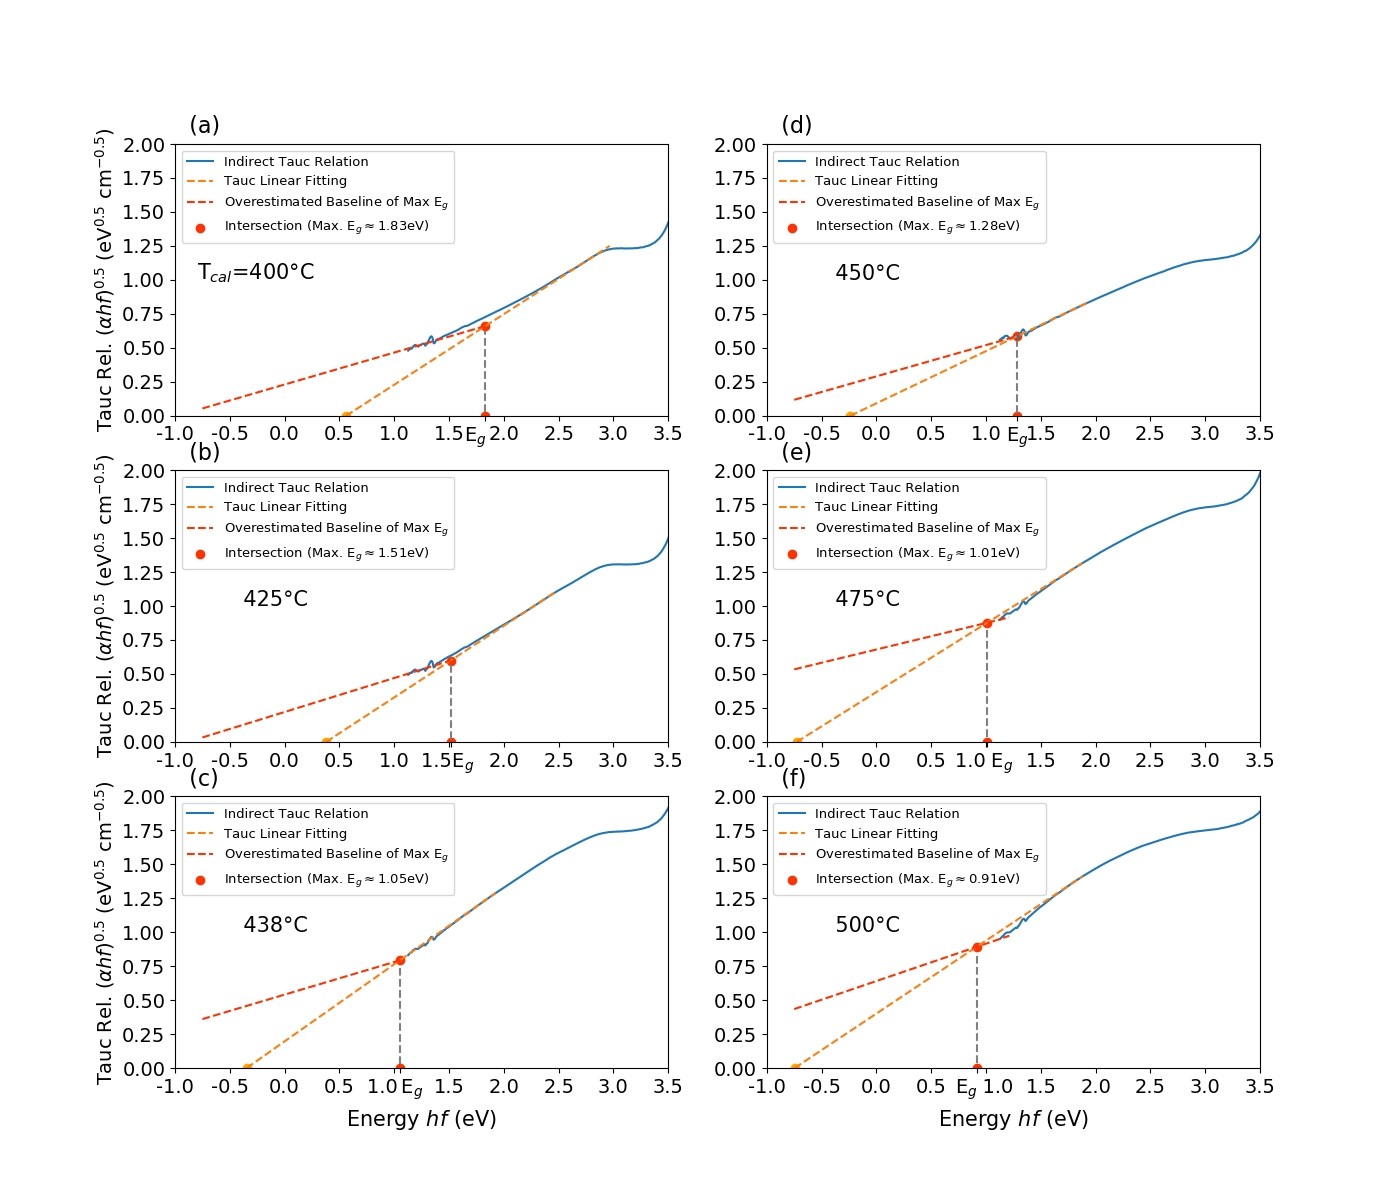

In [29]:
#--------------------
#Subplot de long. onda Vs absorbancia A para 6 Tcal (BajEnergias=AltEnergias)
#--------------------

#Variables de graficas
limXIni2_0Baj=-1.0
limXFin2_0Baj=3.25
#Gap energias opticos tipo float y string
numCifSigGapOpt=4
gapOptFil400C=ajuLinTaucFil_400exp0_5Baj[0,0]
gapOptFil400CStr=( str(gapOptFil400C)[:numCifSigGapOpt] )+"eV"
gapOptFil425C=ajuLinTaucFil_425exp0_5Baj[0,0]
gapOptFil425CStr=( str(gapOptFil425C)[:numCifSigGapOpt] )+"eV"
gapOptFil438C=ajuLinTaucFil_438exp0_5Baj[0,0]
gapOptFil438CStr=( str(gapOptFil438C)[:numCifSigGapOpt] )+"eV"
gapOptFil450C=ajuLinTaucFil_450exp0_5Baj[0,0]
gapOptFil450CStr=( str(gapOptFil450C)[:numCifSigGapOpt] )+"eV"
gapOptFil475C=ajuLinTaucFil_475exp0_5Baj[0,0]
gapOptFil475CStr=( str(gapOptFil475C)[:numCifSigGapOpt] )+"eV"
gapOptFil500C=ajuLinTaucFil_500exp0_5Baj[0,0]
gapOptFil500CStr=( str(gapOptFil500C)[:numCifSigGapOpt] )+"eV"


plt.figure(figsize=[14.0, 12.0]) #plt.figure(1, figsize=[10.0, 14.0]) #figsize=[14.0, 12.0] ; REL tAUC vS HF: figsize=[10.0, 15.0]

#REVISAR SI COINCIDEN Tcal!!!!!!!!

#400°C
ax1 = plt.subplot(3,2,1)
ax1.plot( LamVsA_EneVsTauc400Bajexp0_5[:,2], LamVsA_EneVsTauc400Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax1.plot( ajuLinTaucFil_400exp0_5Baj[:,0], ajuLinTaucFil_400exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax1.scatter( [gapOptFil400C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (a)", loc='left', size=16, pad=8.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"0.5"+r"}$"+" (eV$^{0.5}$ cm$^{-0.5}$)", size=14)
plt.text(-0.8, 1.0, "T$_{cal}$=400°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, EgLinBas400_X1, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", "1.0", "1.5", r"E$_{g}$    ", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas400X1, LinBas400Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas400_X1], [EgLinBas400_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas400_X1+"eV)" )
plt.plot( LinBas400VertX_1[4:94], LinBas400VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas400_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)

#425°C
ax2 = plt.subplot(3,2,3)
ax2.plot( LamVsA_EneVsTauc425Bajexp0_5[:,2], LamVsA_EneVsTauc425Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax2.plot( ajuLinTaucFil_425exp0_5Baj[:,0], ajuLinTaucFil_425exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax2.scatter( [gapOptFil425C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (b)", loc='left', size=16, pad=8.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"0.5"+r"}$"+" (eV$^{0.5}$ cm$^{-0.5}$)", size=14)
plt.text(-0.8, 1.0, "       425°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, EgLinBas425_X1, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", "1.0", "1.5    ", "    E$_{g}$", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas425X1, LinBas425Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas425_X1], [EgLinBas425_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas425_X1+"eV)" )
plt.plot( LinBas425VertX_1[4:94], LinBas425VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas425_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)

#438°C
ax3 = plt.subplot(3,2,5)
ax3.plot( LamVsA_EneVsTauc438Bajexp0_5[:,2], LamVsA_EneVsTauc438Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax3.plot( ajuLinTaucFil_438exp0_5Baj[:,0], ajuLinTaucFil_438exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax3.scatter( [gapOptFil438C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (c)", loc='left', size=16, pad=8.0)
plt.ylabel(r"Tauc Rel. "+r"$(\alpha hf)^{"+"0.5"+r"}$"+" (eV$^{0.5}$ cm$^{-0.5}$)", size=14)
plt.xlabel(r"Energy $hf$ (eV)", size=15)
plt.text(-0.8, 1.0, "       438°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0, EgLinBas438_X1, 1.5, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", "1.0    ", r"    E$_{g}$", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas438X1, LinBas438Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas438_X1], [EgLinBas438_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas438_X1+"eV)" )
plt.plot( LinBas438VertX_1[4:94], LinBas438VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas438_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)

#450°C
ax4 = plt.subplot(3,2,2)
ax4.plot( LamVsA_EneVsTauc450Bajexp0_5[:,2], LamVsA_EneVsTauc450Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax4.plot( ajuLinTaucFil_450exp0_5Baj[:,0], ajuLinTaucFil_450exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax4.scatter( [gapOptFil450C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (d)", loc='left', size=16, pad=8.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.text(-0.8, 1.0, "       450°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0, EgLinBas450_X1, 1.5, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", "1.0", r"E$_{g}$", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas450X1, LinBas450Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas450_X1], [EgLinBas450_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas450_X1+"eV)" )
plt.plot( LinBas450VertX_1[4:94], LinBas450VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas450_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)


#475°C
ax5 = plt.subplot(3,2,4)
ax5.plot( LamVsA_EneVsTauc475Bajexp0_5[:,2], LamVsA_EneVsTauc475Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax5.plot( ajuLinTaucFil_475exp0_5Baj[:,0], ajuLinTaucFil_475exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax5.scatter( [gapOptFil475C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (e)", loc='left', size=16, pad=8.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.text(-0.8, 1.0, "       475°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, 1.0, EgLinBas475_X1, 1.5, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", "1.0     ", r"     E$_{g}$","1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas475X1, LinBas475Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas475_X1], [EgLinBas475_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas475_X1+"eV)" )
plt.plot( LinBas475VertX_1[4:94], LinBas475VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas475_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)


#500°C
ax6 = plt.subplot(3,2,6)
ax6.plot( LamVsA_EneVsTauc500Bajexp0_5[:,2], LamVsA_EneVsTauc500Bajexp0_5[:,3], label="Indirect Tauc Relation" )
ax6.plot( ajuLinTaucFil_500exp0_5Baj[:,0], ajuLinTaucFil_500exp0_5Baj[:,1], '--', label="Tauc Linear Fitting" )
ax6.scatter( [gapOptFil500C], [0.0], color="orange" )
plt.xlim(limXIni2_0Baj, limXFin2_0Baj)
plt.ylim(0.0, 2.0)
plt.title("  (f)", loc='left', size=16, pad=8.0)
#plt.ylabel(r"Absorbance $A$", size=15)
plt.xlabel(r"Energy $hf$ (eV)", size=15)
plt.text(-0.8, 1.0, "       500°C", fontsize=15.0, fontweight=525) #Etiqueta Tcal
plt.xticks([-1.0, -0.5, 0.0, 0.5, EgLinBas500_X1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ["-1.0", "-0.5", "0.0", "0.5", r"E$_{g}$    ", "    1.0", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=14)
plt.yticks(fontsize=14)
plt.plot( LinBas500X1, LinBas500Y1, '--', color=(1.0,0.2,0.0), label=r"Overestimated Baseline of Max E$_{g}$" )
plt.scatter( [EgLinBas500_X1], [EgLinBas500_Y1], color=(1.0,0.2,0.0), label=r"Intersection (Max. E$_{g}\approx$"+StrEgLinBas500_X1+"eV)" )
plt.plot( LinBas500VertX_1[4:94], LinBas500VertY_1[4:94], '--', color=(0.5,0.5,0.5) )
plt.scatter( [EgLinBas500_X1], [0.0], color=(1.0,0.2,0.0) )
plt.legend(loc='upper left', fontsize=9.45)


#plt.show()
plt.savefig("2021_M7_1_V2O5NoAcuRelTaucVsEne6Tcalexp0_5.pdf", bbox_inches='tight')

# 2021_M7_13: Gráfica E$_{g}$ Vs T$_{cal}$ sin barras de error ni regresión lineal verde para trasnición electrónica directa de exponente $\frac{1}{n} = 2$

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


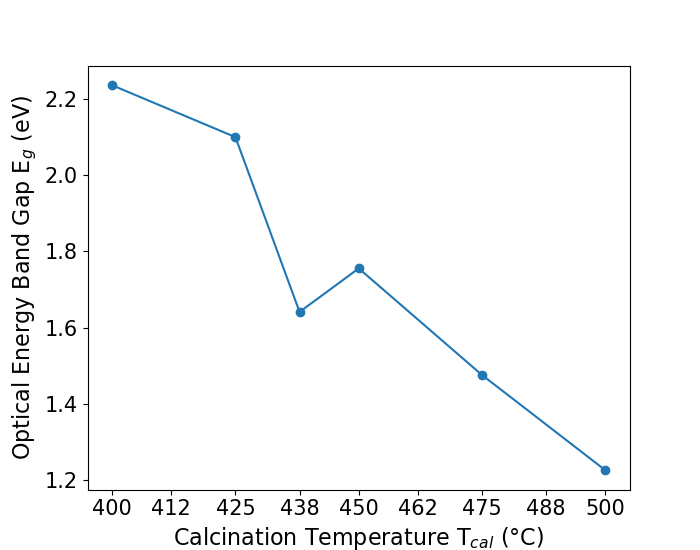

In [30]:
plt.figure(figsize=[7.0, 5.5])
#plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10)
plt.plot(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], 'o-')
plt.xlabel(r"Calcination Temperature T$_{cal}$ (°C)", size=16)
plt.ylabel(r"Optical Energy Band Gap E$_{g}$ (eV)", size=16)
plt.xticks([400.0, 412, 425.0, 438.0, 450.0, 462.0, 475.0, 488.0, 500.0], ["400", "412", "425", "438", "450", "462", "475", "488", "500"], fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(loc=0)

#plt.show()
plt.savefig("2021_M7_13"+"_V2O5NoAcu_DefEgVsTcal_"+"exp2_0"+"BajEnergias.pdf", bbox_inches='tight')

In [31]:
EgVsTcalVASP=[2.37592647,
              2.42658769,
              2.27666598,
              2.44817457,
              2.46076461,
              2.42541619]

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


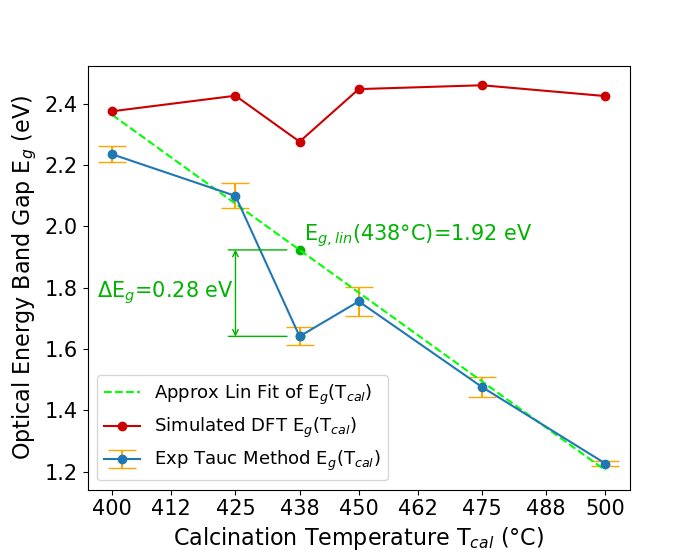

In [39]:


#Graficar todo junto
plt.figure(figsize=[7.0, 5.5])
plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,1], yerr=TVsEg_exp2_0Baj[:,2], marker='o', ecolor="orange", capsize=10, label="Exp Tauc Method E$_{g}$(T$_{cal}$)")
plt.plot( ajuLinDesVacX, ajuLinDesVacY, '--', color=(0.0,1.0,0.0), label="Approx Lin Fit of E$_{g}$(T$_{cal}$)" )
plt.scatter( [438.0, 438.0], [EgRegLin438C_DesVac, EgTaucFilSG438C], color=(0.0,0.7,0.0)  )
plt.plot( TVsEg_exp2_0Baj[:,0], EgVsTcalVASP, 'o-', color=(0.8,0.0,0.0), label="Simulated DFT E$_{g}$(T$_{cal}$)" )
#plt.errorbar(TVsEg_exp2_0Baj[:,0], TVsEg_exp2_0Baj[:,3], yerr=TVsEg_exp2_0Baj[:,4], marker='o', ecolor="red", color="green", capsize=10)
#plt.title(r"$E_{g}$ Vs $T_{cal}$ for Indirect Allowed Transitions and Low Energies", size=14)
plt.xlabel(r"Calcination Temperature T$_{cal}$ (°C)", size=16)
plt.ylabel(r"Optical Energy Band Gap E$_{g}$ (eV)", size=16)
plt.xticks([400.0, 412, 425.0, 438.0, 450.0, 462.0, 475.0, 488.0, 500.0], ["400", "412", "425", "438", "450", "462", "475", "488", "500"], fontsize=15)
plt.yticks(fontsize=15)
plt.annotate("", xy=(425.0, EgRegLin438C_DesVac+0.01), xytext=(425.0, EgTaucFilSG438C-0.01), arrowprops=dict(arrowstyle="<->", color=(0.0,0.7,0.0)))
plt.annotate("", xy=(423.0, EgRegLin438C_DesVac), xytext=(436.0, EgRegLin438C_DesVac), arrowprops=dict(arrowstyle="-", color=(0.0,0.7,0.0)))
plt.annotate("", xy=(423.0, EgTaucFilSG438C), xytext=(436.0, EgTaucFilSG438C), arrowprops=dict(arrowstyle="-", color=(0.0,0.7,0.0)))
plt.text(397.0, 1.77, EgDesVacYExpTauc, fontsize=15.0, fontweight=525, color=(0.0,0.7,0.0) )
plt.text(439.0, EgRegLin438C_DesVac+0.03, EgDesVacStr, fontsize=15.0, fontweight=525, color=(0.0,0.7,0.0) )
plt.legend(fontsize=13.0)
#plt.show()
plt.savefig("2021_M8_3"+"_V2O5NoAcu_DefEgVsTcal_"+"exp2_0"+"BajEnergias"+Formato, bbox_inches='tight')